In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data = pd.read_csv('../data/donor_data.csv')
test_data = pd.read_csv('../data/prospective_data.csv')

In [3]:
train_data.head()

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,NaN,5,101,87.0,0,?,?,.,H,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,10.0,12,137,79.0,0,R,2,45,H,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,NaN,37,113,75.0,0,S,1,11,H,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,NaN,38,92,NaN,0,U,2,04,H,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,NaN,41,101,74.0,0,R,2,49,U,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


In [4]:
test_data.head()

,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,DONOR_GENDER,INCOME_GROUP,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,139,101,NaN,0,R,2,46,U,F,NaN,...,16.0,21.0,5.0,21.0,4,10,26,90,14.71,2
1,142,137,NaN,0,R,2,43,U,F,NaN,...,9.0,11.0,2.0,10.0,9,22,22,129,6.00,14
2,282,17,30.0,0,T,1,35,H,M,6.0,...,15.0,20.0,5.0,20.0,5,14,20,87,8.44,1
3,368,137,75.0,0,U,1,02,H,M,6.0,...,5.0,10.0,5.0,10.0,10,24,19,129,6.50,22
4,387,5,NaN,0,T,2,40,U,F,2.0,...,7.0,10.0,3.0,5.0,5,12,18,85,5.83,2


In [5]:
##converting the upper case features to lower class to make my eda easier

train_data.columns = train_data.columns.str.lower()
test_data.columns = test_data.columns.str.lower()

In [6]:
train_data.columns.to_list()


['target_b',
 'target_d',
 'control_number',
 'months_since_origin',
 'donor_age',
 'in_house',
 'urbanicity',
 'ses',
 'cluster_code',
 'home_owner',
 'donor_gender',
 'income_group',
 'published_phone',
 'overlay_source',
 'mor_hit_rate',
 'wealth_rating',
 'median_home_value',
 'median_household_income',
 'pct_owner_occupied',
 'per_capita_income',
 'pct_attribute1',
 'pct_attribute2',
 'pct_attribute3',
 'pct_attribute4',
 'pep_star',
 'recent_star_status',
 'recency_status_96nk',
 'frequency_status_97nk',
 'recent_response_prop',
 'recent_avg_gift_amt',
 'recent_card_response_prop',
 'recent_avg_card_gift_amt',
 'recent_response_count',
 'recent_card_response_count',
 'months_since_last_prom_resp',
 'lifetime_card_prom',
 'lifetime_prom',
 'lifetime_gift_amount',
 'lifetime_gift_count',
 'lifetime_avg_gift_amt',
 'lifetime_gift_range',
 'lifetime_max_gift_amt',
 'lifetime_min_gift_amt',
 'last_gift_amt',
 'card_prom_12',
 'number_prom_12',
 'months_since_last_gift',
 'months_since

In [7]:
test_data.columns.to_list()

['control_number',
 'months_since_origin',
 'donor_age',
 'in_house',
 'urbanicity',
 'ses',
 'cluster_code',
 'home_owner',
 'donor_gender',
 'income_group',
 'published_phone',
 'overlay_source',
 'mor_hit_rate',
 'wealth_rating',
 'median_home_value',
 'median_household_income',
 'pct_owner_occupied',
 'per_capita_income',
 'pct_attribute1',
 'pct_attribute2',
 'pct_attribute3',
 'pct_attribute4',
 'pep_star',
 'recent_star_status',
 'recency_status_96nk',
 'frequency_status_97nk',
 'recent_response_prop',
 'recent_avg_gift_amt',
 'recent_card_response_prop',
 'recent_avg_card_gift_amt',
 'recent_response_count',
 'recent_card_response_count',
 'months_since_last_prom_resp',
 'lifetime_card_prom',
 'lifetime_prom',
 'lifetime_gift_amount',
 'lifetime_gift_count',
 'lifetime_avg_gift_amt',
 'lifetime_gift_range',
 'lifetime_max_gift_amt',
 'lifetime_min_gift_amt',
 'last_gift_amt',
 'card_prom_12',
 'number_prom_12',
 'months_since_last_gift',
 'months_since_first_gift',
 'file_avg_g

# Data Cleaning and Exploratory Data Analysis

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   target_b                     19372 non-null  int64  
 1   target_d                     4843 non-null   float64
 2   control_number               19372 non-null  int64  
 3   months_since_origin          19372 non-null  int64  
 4   donor_age                    14577 non-null  float64
 5   in_house                     19372 non-null  int64  
 6   urbanicity                   19372 non-null  object 
 7   ses                          19372 non-null  object 
 8   cluster_code                 19372 non-null  object 
 9   home_owner                   19372 non-null  object 
 10  donor_gender                 19372 non-null  object 
 11  income_group                 14980 non-null  float64
 12  published_phone              19372 non-null  int64  
 13  overlay_source  

In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   control_number               2148 non-null   int64  
 1   months_since_origin          2148 non-null   int64  
 2   donor_age                    1619 non-null   float64
 3   in_house                     2148 non-null   int64  
 4   urbanicity                   2148 non-null   object 
 5   ses                          2148 non-null   object 
 6   cluster_code                 2148 non-null   object 
 7   home_owner                   2148 non-null   object 
 8   donor_gender                 2148 non-null   object 
 9   income_group                 1667 non-null   float64
 10  published_phone              2148 non-null   int64  
 11  overlay_source               2148 non-null   object 
 12  mor_hit_rate                 2148 non-null   int64  
 13  wealth_rating     

In [10]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
target_b,19372.0,0.250000,0.433024,0.00,0.000,0.000,0.250,1.0
target_d,4843.0,15.624344,12.445137,1.00,10.000,13.000,20.000,200.0
control_number,19372.0,96546.225377,55830.643871,5.00,48289.000,96937.000,145429.500,191779.0
months_since_origin,19372.0,73.409973,41.255574,5.00,29.000,65.000,113.000,137.0
donor_age,14577.0,58.919051,16.669382,0.00,47.000,60.000,73.000,87.0
in_house,19372.0,0.073198,0.260469,0.00,0.000,0.000,0.000,1.0
income_group,14980.0,3.907543,1.864796,1.00,2.000,4.000,5.000,7.0
published_phone,19372.0,0.497729,0.500008,0.00,0.000,0.000,1.000,1.0
mor_hit_rate,19372.0,3.361656,9.503481,0.00,0.000,0.000,3.000,241.0
wealth_rating,10562.0,5.005397,2.815386,0.00,3.000,5.000,7.000,9.0


In [11]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
control_number,2148.0,96146.865456,54518.044553,139.00,51402.000,96092.000,143196.000,191710.0
months_since_origin,2148.0,73.631285,41.969403,5.00,29.000,65.000,113.000,137.0
donor_age,1619.0,58.185917,16.765323,4.00,46.000,59.000,71.000,87.0
in_house,2148.0,0.067970,0.251753,0.00,0.000,0.000,0.000,1.0
income_group,1667.0,3.902819,1.840627,1.00,2.000,4.000,5.000,7.0
published_phone,2148.0,0.493017,0.500068,0.00,0.000,0.000,1.000,1.0
mor_hit_rate,2148.0,3.357076,8.585609,0.00,0.000,0.000,3.000,240.0
wealth_rating,1142.0,4.974606,2.809815,0.00,3.000,5.000,7.000,9.0
median_home_value,2148.0,1028.019088,895.363300,0.00,508.750,738.500,1159.500,5982.0
median_household_income,2148.0,339.798417,149.754159,0.00,239.000,314.000,415.000,1500.0


In [12]:
train_data.isnull().sum()

target_b                           0
target_d                       14529
control_number                     0
months_since_origin                0
donor_age                       4795
in_house                           0
urbanicity                         0
ses                                0
cluster_code                       0
home_owner                         0
donor_gender                       0
income_group                    4392
published_phone                    0
overlay_source                     0
mor_hit_rate                       0
wealth_rating                   8810
median_home_value                  0
median_household_income            0
pct_owner_occupied                 0
per_capita_income                  0
pct_attribute1                     0
pct_attribute2                     0
pct_attribute3                     0
pct_attribute4                     0
pep_star                           0
recent_star_status                 0
recency_status_96nk                0
f

In [13]:
test_data.isnull().sum()

control_number                    0
months_since_origin               0
donor_age                       529
in_house                          0
urbanicity                        0
ses                               0
cluster_code                      0
home_owner                        0
donor_gender                      0
income_group                    481
published_phone                   0
overlay_source                    0
mor_hit_rate                      0
wealth_rating                  1006
median_home_value                 0
median_household_income           0
pct_owner_occupied                0
per_capita_income                 0
pct_attribute1                    0
pct_attribute2                    0
pct_attribute3                    0
pct_attribute4                    0
pep_star                          0
recent_star_status                0
recency_status_96nk               0
frequency_status_97nk             0
recent_response_prop              0
recent_avg_gift_amt         

In [14]:
train_data['target_d'].value_counts()

10.00     941
15.00     591
20.00     577
5.00      503
25.00     392
         ... 
16.87       1
101.00      1
13.92       1
5.25        1
55.00       1
Name: target_d, Length: 70, dtype: int64

#### Looking at the missing values from the target_d column, it is observed that the values with nan are values from people who didn't donate. Rather that using nan, I will be substituing nan as 0 as those who didn't donate also gave $0 

In [15]:
train_data['target_d'] = train_data['target_d'].replace(np.nan, 0.00)

In [16]:
train_data.shape

(19372, 50)

In [17]:
test_data.shape

(2148, 48)

In [18]:
# Checking for the number of unique values in each column
# This is to check for consistency, uniformity and accuracy
# A for loop has been used to print unique values for each column
#
for column in train_data.columns:
  print(column)
  print(train_data[column].nunique())
  print(train_data[column].unique())
  print('\n')

target_b
2
[0 1]


target_d
71
[  0.    10.     5.    16.     3.    12.     8.    15.    33.    20.
  25.    35.     2.    11.    18.    40.    21.    32.    30.    14.
  24.    50.    12.5    7.     9.     4.     6.    28.    13.    17.
  27.    36.    22.    23.    31.    19.    48.    75.   100.    47.
  44.    95.     1.   102.   101.    34.    10.7   60.    45.    26.
  17.5   16.87  38.    41.   200.    37.    18.25  29.    51.    46.
  42.     2.5   43.    53.     7.5    5.25  55.     4.5   44.21  13.92
 150.  ]


control_number
19372
[     5     12     37 ... 191746 191775 191779]


months_since_origin
28
[101 137 113  92  89 125  77  65  17  53  41   5  29  19  21 122 127 124
  57 134  54 130  32 115  67 119  40 129]


donor_age
80
[87. 79. 75. nan 74. 63. 71. 41. 73. 81. 76. 69. 45. 43. 55. 77. 37. 52.
 30. 67. 65. 59. 42. 58. 56. 80. 82. 64. 48. 85. 47. 70. 40. 32. 53. 86.
 54. 33. 60. 49.  7. 17. 57. 78. 50. 39. 66. 51. 72. 38. 61. 68. 24. 16.
 84. 44. 34. 83. 35. 29. 26. 2

In [19]:
# Checking for the number of unique values in each column
# This is to check for consistency, uniformity and accuracy
# A for loop has been used to print unique values for each column
#
for column in test_data.columns:
  print(column)
  print(test_data[column].nunique())
  print(test_data[column].unique())
  print('\n')

control_number
2148
[   139    142    282 ... 191164 191484 191710]


months_since_origin
15
[101 137  17   5 125  89  41 113  65  77  29  53  57  67 119]


donor_age
73
[nan 30. 75. 80. 59. 53. 60. 49. 71.  7. 47. 39. 79. 81. 52. 45. 84. 83.
 73. 16. 26. 67. 17. 78. 61. 82. 31. 72. 74. 87. 58. 76. 85. 62. 37. 54.
 86. 68. 51. 63. 77. 65. 43. 66. 50.  6. 70. 48. 35. 57. 55. 56. 69. 46.
 42. 34. 44. 29. 41. 38. 36. 33. 32. 23. 25. 27. 22. 40. 64. 28. 21. 20.
  4. 24.]


in_house
2
[0 1]


urbanicity
6
['R' 'T' 'U' 'C' 'S' '?']


ses
5
['2' '1' '3' '?' '4']


cluster_code
54
['46' '43' '35' '02' '40' '37' '24' '11' '21' '16' '42' '27' '09' '12'
 '45' '26' '53' '25' '18' ' .' '29' '28' '14' '30' '39' '05' '20' '08'
 '17' '34' '07' '31' '13' '03' '36' '06' '04' '33' '49' '01' '50' '22'
 '23' '38' '41' '51' '10' '47' '32' '15' '44' '48' '19' '52']


home_owner
2
['U' 'H']


donor_gender
3
['F' 'M' 'U']


income_group
7
[nan  6.  2.  7.  3.  5.  4.  1.]


published_phone
2
[0 1]


overlay_so

### Observations
* Age has a value with zero(0) which isn't right
* The Overlay column is meant to take 3 values; M=Metromail; P=Polk; B=Both. But it takes 4 values with the fourth value (4th) value being "n". I am going to assume this was a mistake and replace n with the value n
* Cluster code has a value with ".". This will be replaced with the most apporopriate method
* Donor Gender takes 4 values. Male, Female, Unknown and A. I am assuming the A value is a mistake as it takes one (1) value. It will be replaced appropriately
* "?" represents unknown wherever found


#### It is interesting to see that the on the income group column, users with the income group of level 5 donate more than any other income group. Also level 5 income group users do not donate as much as other income groups. This could as a result of most users falling into income group of level 5

In [20]:
#rename TARGET_B AS Donated
train_data.rename(columns={'target_b':'donated', 'target_d': 'amount_donated'}, inplace=True)

## Dealing with Missing Data and Miscellenous Data

In [21]:
train_data.isnull().sum()

donated                           0
amount_donated                    0
control_number                    0
months_since_origin               0
donor_age                      4795
in_house                          0
urbanicity                        0
ses                               0
cluster_code                      0
home_owner                        0
donor_gender                      0
income_group                   4392
published_phone                   0
overlay_source                    0
mor_hit_rate                      0
wealth_rating                  8810
median_home_value                 0
median_household_income           0
pct_owner_occupied                0
per_capita_income                 0
pct_attribute1                    0
pct_attribute2                    0
pct_attribute3                    0
pct_attribute4                    0
pep_star                          0
recent_star_status                0
recency_status_96nk               0
frequency_status_97nk       

In [22]:
test_data.isnull().sum()

control_number                    0
months_since_origin               0
donor_age                       529
in_house                          0
urbanicity                        0
ses                               0
cluster_code                      0
home_owner                        0
donor_gender                      0
income_group                    481
published_phone                   0
overlay_source                    0
mor_hit_rate                      0
wealth_rating                  1006
median_home_value                 0
median_household_income           0
pct_owner_occupied                0
per_capita_income                 0
pct_attribute1                    0
pct_attribute2                    0
pct_attribute3                    0
pct_attribute4                    0
pep_star                          0
recent_star_status                0
recency_status_96nk               0
frequency_status_97nk             0
recent_response_prop              0
recent_avg_gift_amt         

### The columns with missing data are
* Donor Age
* Income Group
* Wealth Rating
* Months since last prom Resp

In [23]:
# Checking the datatype of each column
# Before filling missing values, the column dtypes should first be changed to their appriopriate datatype
#
train_data.dtypes

donated                          int64
amount_donated                 float64
control_number                   int64
months_since_origin              int64
donor_age                      float64
in_house                         int64
urbanicity                      object
ses                             object
cluster_code                    object
home_owner                      object
donor_gender                    object
income_group                   float64
published_phone                  int64
overlay_source                  object
mor_hit_rate                     int64
wealth_rating                  float64
median_home_value                int64
median_household_income          int64
pct_owner_occupied               int64
per_capita_income                int64
pct_attribute1                   int64
pct_attribute2                   int64
pct_attribute3                   int64
pct_attribute4                   int64
pep_star                         int64
recent_star_status       

In [24]:
# Checking the datatype of each column
# Before filling missing values, the column dtypes should first be changed to their appriopriate datatype
#
test_data.dtypes

control_number                   int64
months_since_origin              int64
donor_age                      float64
in_house                         int64
urbanicity                      object
ses                             object
cluster_code                    object
home_owner                      object
donor_gender                    object
income_group                   float64
published_phone                  int64
overlay_source                  object
mor_hit_rate                     int64
wealth_rating                  float64
median_home_value                int64
median_household_income          int64
pct_owner_occupied               int64
per_capita_income                int64
pct_attribute1                   int64
pct_attribute2                   int64
pct_attribute3                   int64
pct_attribute4                   int64
pep_star                         int64
recent_star_status               int64
recency_status_96nk             object
frequency_status_97nk    

In [25]:
## Counting the number of unique ages of the donors, the minumum, maximum and mean age as well

print('For the Train dataset')
print('The number of unique age is :',train_data.donor_age.nunique())
print('The minimum age is :',train_data.donor_age.min())
print('The maximum age is :',train_data.donor_age.max())
print('The mean age is :',train_data.donor_age.mean())

For the Train dataset
The number of unique age is : 80
The minimum age is : 0.0
The maximum age is : 87.0
The mean age is : 58.91905055909995


#### There is a minimum age of 0 which makes no sense as there can't be anyone aged 0.

In [26]:
## Counting the number of unique ages of the donors, the minumum, maximum and mean age as well

print('For the Test dataset')
print('The number of unique age is :',test_data.donor_age.nunique())
print('The minimum age is :',test_data.donor_age.min())
print('The maximum age is :',test_data.donor_age.max())
print('The mean age is :',test_data.donor_age.mean())

For the Test dataset
The number of unique age is : 73
The minimum age is : 4.0
The maximum age is : 87.0
The mean age is : 58.18591723285979


#### Replacing the age of 0 with NAN

In [27]:
train_data['donor_age'] = train_data['donor_age'].replace(0, np.nan)

In [28]:
train_data.isnull().sum()

donated                           0
amount_donated                    0
control_number                    0
months_since_origin               0
donor_age                      4797
in_house                          0
urbanicity                        0
ses                               0
cluster_code                      0
home_owner                        0
donor_gender                      0
income_group                   4392
published_phone                   0
overlay_source                    0
mor_hit_rate                      0
wealth_rating                  8810
median_home_value                 0
median_household_income           0
pct_owner_occupied                0
per_capita_income                 0
pct_attribute1                    0
pct_attribute2                    0
pct_attribute3                    0
pct_attribute4                    0
pep_star                          0
recent_star_status                0
recency_status_96nk               0
frequency_status_97nk       

#### Visializing the donor age column

<AxesSubplot:ylabel='Frequency'>

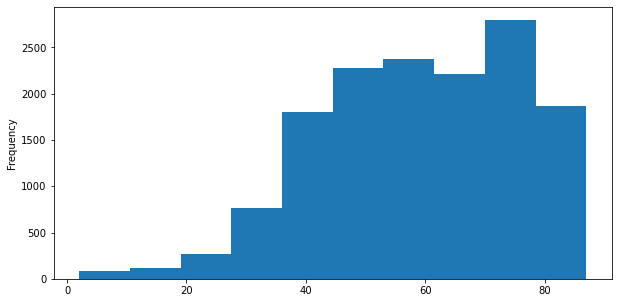

In [29]:
train_data['donor_age'].plot.hist(figsize=(10,5))

- the data is left-skewed.
- employ median to fill in missing data

### Distribution Plot

* We can visualize the distribution of the donor age

<AxesSubplot:xlabel='donor_age', ylabel='Density'>

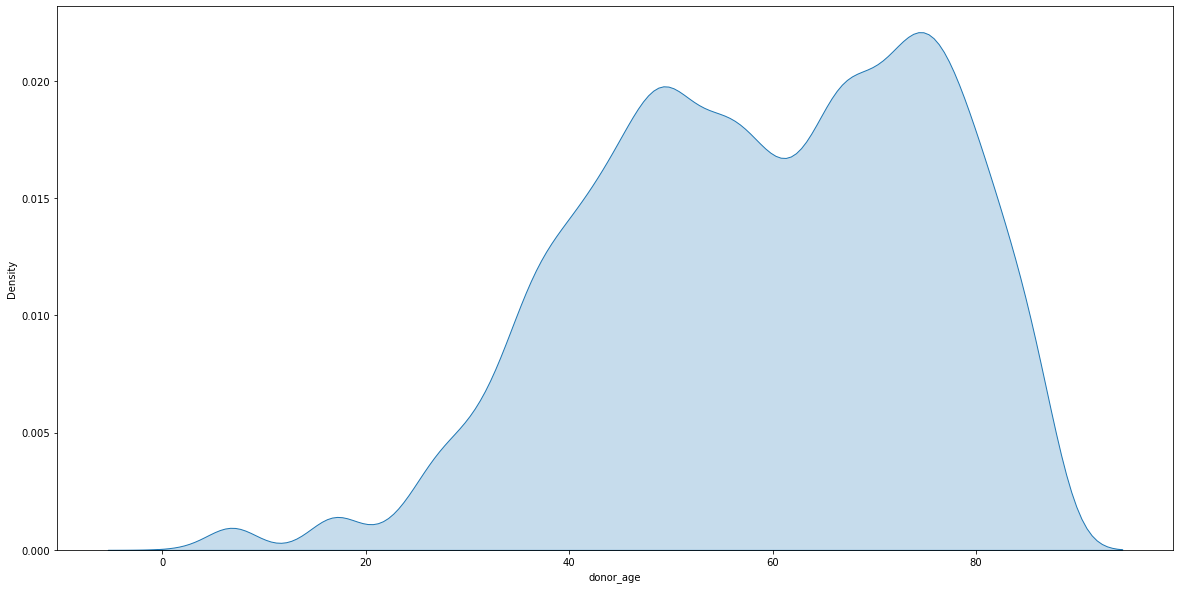

In [30]:
fig = plt.figure(figsize=(20,10))
sns.kdeplot(x = train_data.donor_age,shade = True)

<AxesSubplot:ylabel='Frequency'>

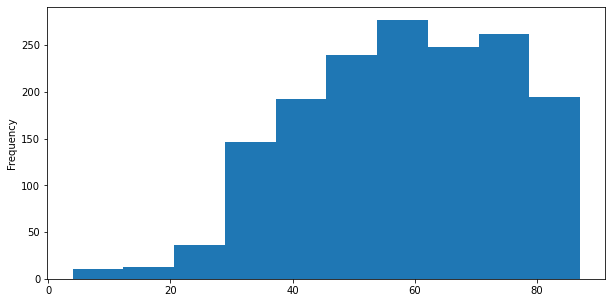

In [31]:
test_data['donor_age'].plot.hist(figsize=(10,5))

<AxesSubplot:xlabel='donor_age', ylabel='Density'>

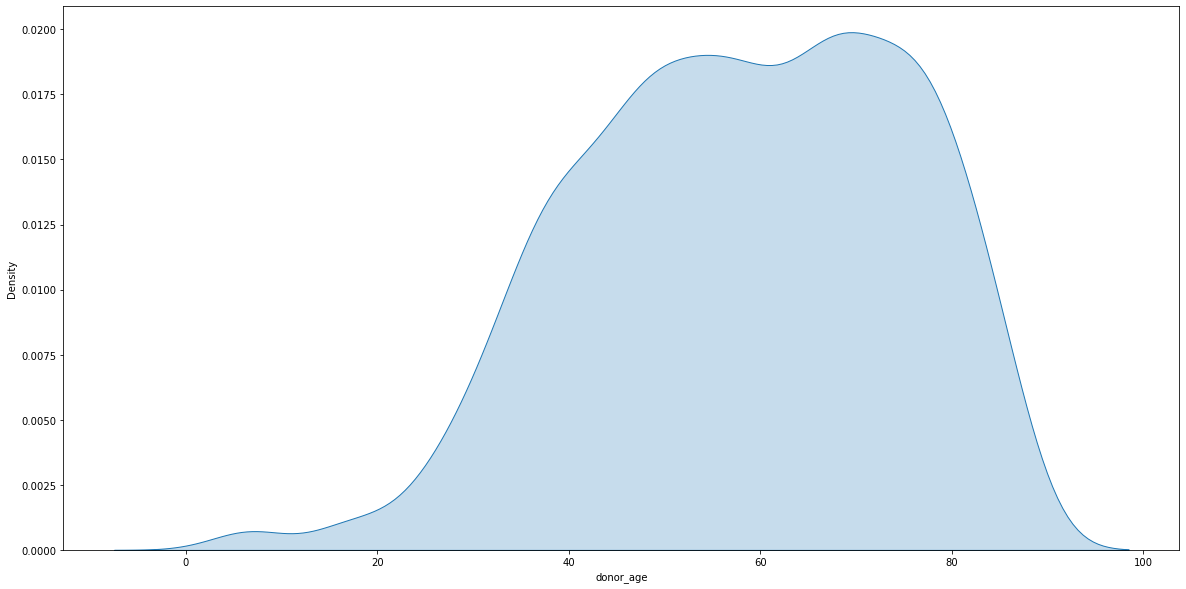

In [32]:
fig = plt.figure(figsize=(20,10))
sns.kdeplot(x = test_data.donor_age, shade = True)

In [33]:
train_donor_median_age = train_data.donor_age.median()
test_donor_median_age = test_data.donor_age.median()

print('The train median age is : ',train_donor_median_age)
print('The test median age is : ',test_donor_median_age)

# filling the missing values in train set with that of the train data
train_data.donor_age = train_data.donor_age.fillna(value = train_donor_median_age)

# filling the missing values in test set with that of the test data
test_data.donor_age = test_data.donor_age.fillna(value = test_donor_median_age)

The train median age is :  60.0
The test median age is :  59.0


## Working on the missing values in the income group column

5.0    3149
2.0    2626
4.0    2526
1.0    1822
3.0    1699
6.0    1591
7.0    1567
Name: income_group, dtype: int64

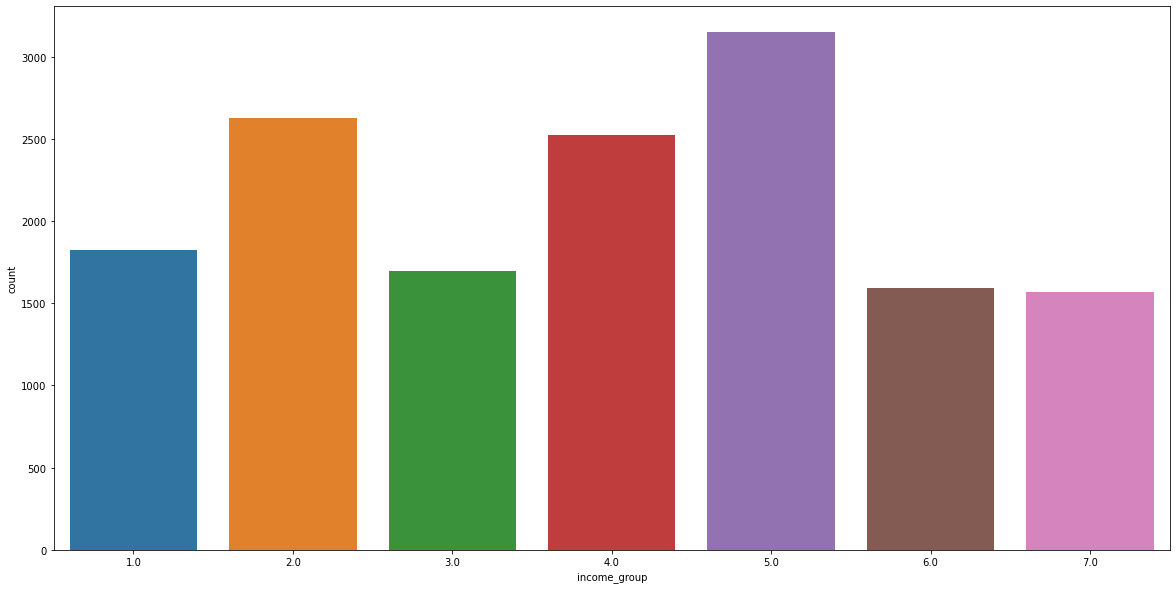

In [34]:
fig = plt.figure(figsize=(20,10))
sns.countplot(x = train_data.income_group)
train_data.income_group.value_counts()

<AxesSubplot:ylabel='income_group'>

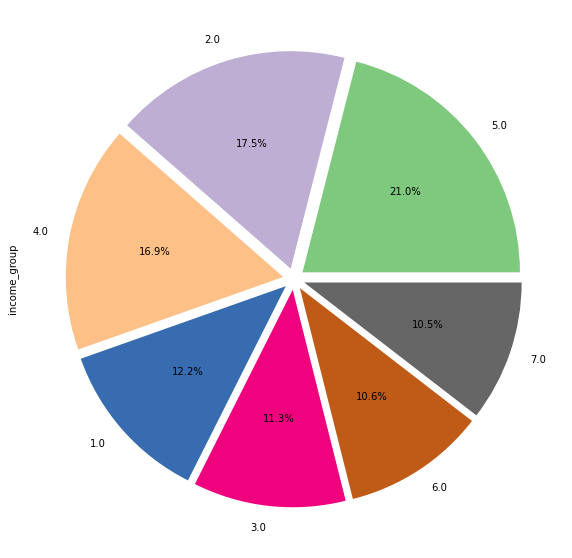

In [35]:
fig = plt.figure(figsize=(20,10))
train_data.income_group.value_counts().plot(kind = 'pie', explode = [0.05]*7, cmap = 'Accent', autopct =  '%0.1f%%')

* **filling the income_group values with the mode**

In [36]:
train_income_group_mode = train_data.income_group.mode()[0]
print('The mode for income_group  is : ',train_income_group_mode)
train_data.income_group = train_data.income_group.fillna(value = train_income_group_mode)

# filling the missing values in test set with that of the training data
test_income_group_mode = test_data.income_group.mode()[0]
print('The mode for income_group is : ',test_income_group_mode)
test_data.income_group = test_data.income_group.fillna(value = test_income_group_mode)

The mode for income_group  is :  5.0
The mode for income_group is :  5.0


## Working on the missing values in the Wealth Rating column

9.0    1390
8.0    1248
7.0    1199
6.0    1117
5.0    1078
3.0    1046
4.0     987
2.0     974
1.0     854
0.0     669
Name: wealth_rating, dtype: int64

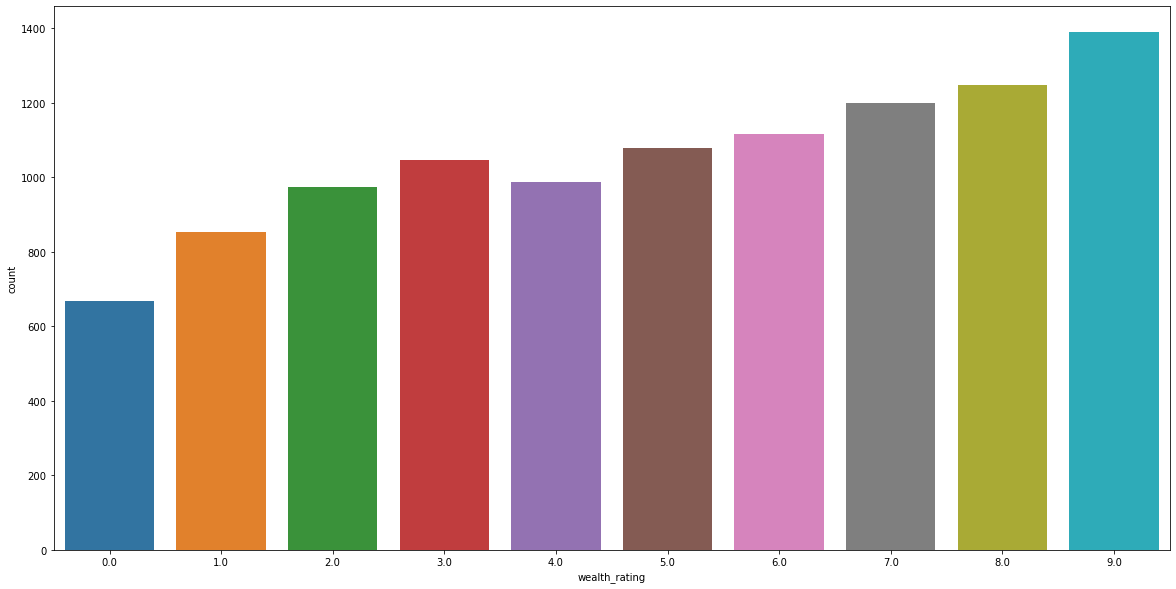

In [37]:
fig = plt.figure(figsize=(20,10))
sns.countplot(x = train_data.wealth_rating)
train_data.wealth_rating.value_counts()

<AxesSubplot:ylabel='wealth_rating'>

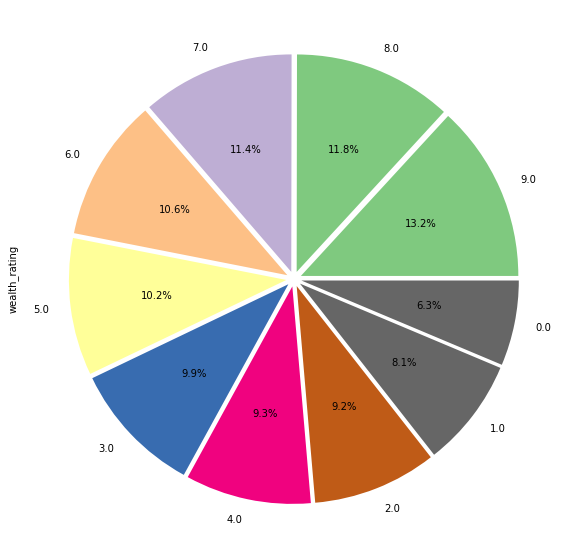

In [38]:
fig = plt.figure(figsize=(20,10))
train_data.wealth_rating.value_counts().plot(kind = 'pie',explode = [0.035]*10, cmap = 'Accent', autopct =  '%0.1f%%')

* **filling the wealth rating column values with the median as the data is skewwed to the left**

In [39]:
train_wealth_rating_median = train_data.wealth_rating.median()
print('The median for wealth_rating  is : ',train_wealth_rating_median)
train_data.wealth_rating = train_data.wealth_rating.fillna(value = train_wealth_rating_median)

# filling the missing values in test set with that of the training data
test_wealth_rating_median = test_data.wealth_rating.median()
print('The median for wealth_rating is : ',test_wealth_rating_median)
test_data.wealth_rating = test_data.wealth_rating.fillna(value = test_wealth_rating_median)

The median for wealth_rating  is :  5.0
The median for wealth_rating is :  5.0


## Working on the missing values in the Month Since Last Prom Resp column

<AxesSubplot:ylabel='Frequency'>

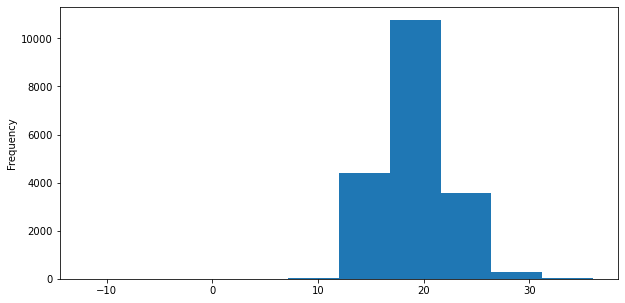

In [40]:
train_data['months_since_last_prom_resp'].plot.hist(figsize=(10,5))

<AxesSubplot:xlabel='months_since_last_prom_resp', ylabel='Density'>

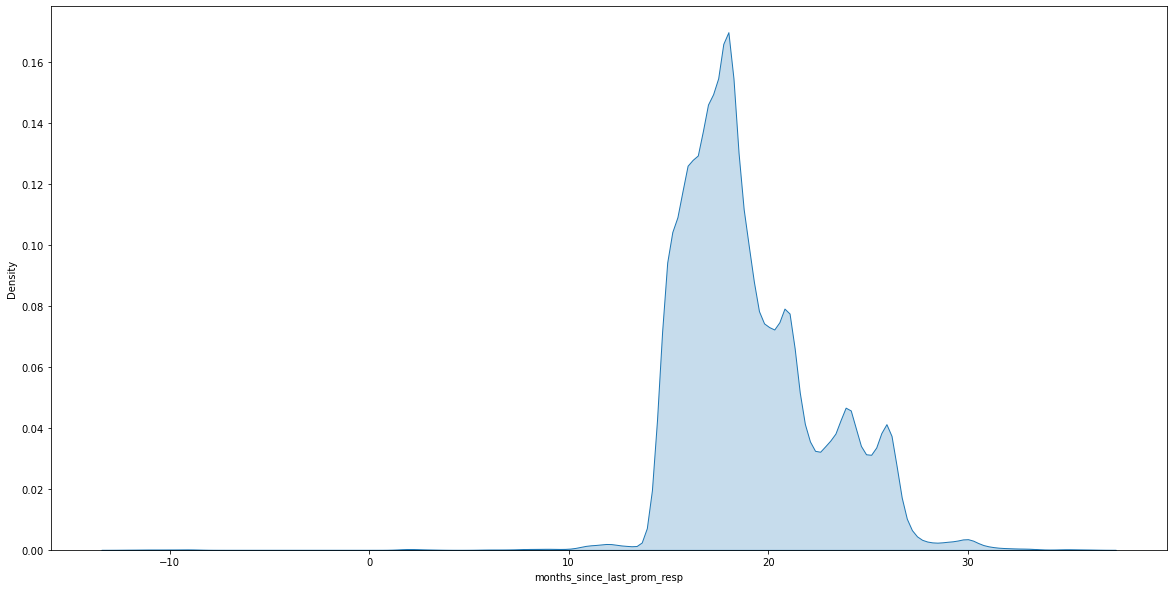

In [41]:
fig = plt.figure(figsize=(20,10))
sns.kdeplot(x = train_data.months_since_last_prom_resp,shade = True)

### it can be observed that the months since last prom response is left skewwed. This shall be filled using the median

In [42]:
train_months_since_last_prom_resp_median = train_data.months_since_last_prom_resp.median()
print('For the train data, the median for months_since_last_prom_resp  is : ',train_months_since_last_prom_resp_median)
train_data.months_since_last_prom_resp = train_data.months_since_last_prom_resp.fillna(value = train_months_since_last_prom_resp_median)

# filling the missing values in test set with that of the training data
test_months_since_last_prom_resp_median = test_data.months_since_last_prom_resp.median()
print('For the test data, the median for months_since_last_prom_resp is : ',test_months_since_last_prom_resp_median)
test_data.months_since_last_prom_resp = test_data.months_since_last_prom_resp.fillna(value = test_months_since_last_prom_resp_median)

For the train data, the median for months_since_last_prom_resp  is :  18.0
For the test data, the median for months_since_last_prom_resp is :  18.0


### Checking if there are still null values in the data set

In [43]:
train_data.isnull().sum()

donated                        0
amount_donated                 0
control_number                 0
months_since_origin            0
donor_age                      0
in_house                       0
urbanicity                     0
ses                            0
cluster_code                   0
home_owner                     0
donor_gender                   0
income_group                   0
published_phone                0
overlay_source                 0
mor_hit_rate                   0
wealth_rating                  0
median_home_value              0
median_household_income        0
pct_owner_occupied             0
per_capita_income              0
pct_attribute1                 0
pct_attribute2                 0
pct_attribute3                 0
pct_attribute4                 0
pep_star                       0
recent_star_status             0
recency_status_96nk            0
frequency_status_97nk          0
recent_response_prop           0
recent_avg_gift_amt            0
recent_car

In [44]:
test_data.isnull().sum()

control_number                 0
months_since_origin            0
donor_age                      0
in_house                       0
urbanicity                     0
ses                            0
cluster_code                   0
home_owner                     0
donor_gender                   0
income_group                   0
published_phone                0
overlay_source                 0
mor_hit_rate                   0
wealth_rating                  0
median_home_value              0
median_household_income        0
pct_owner_occupied             0
per_capita_income              0
pct_attribute1                 0
pct_attribute2                 0
pct_attribute3                 0
pct_attribute4                 0
pep_star                       0
recent_star_status             0
recency_status_96nk            0
frequency_status_97nk          0
recent_response_prop           0
recent_avg_gift_amt            0
recent_card_response_prop      0
recent_avg_card_gift_amt       0
recent_res

## Dealing with miscellaneous data

#### Despite the fact that there are no "missing" values, there are some misellaneous values in the data set like '?' and   ' .'
#### We will deal with them now

In [45]:
# Checking for the number of unique values in each column
# This is to check for consistency, uniformity and accuracy
# A for loop has been used to print unique values for each column
#
for column in train_data.columns:
  print(column)
  print(train_data[column].nunique())
  print(train_data[column].unique())
  print('\n')

donated
2
[0 1]


amount_donated
71
[  0.    10.     5.    16.     3.    12.     8.    15.    33.    20.
  25.    35.     2.    11.    18.    40.    21.    32.    30.    14.
  24.    50.    12.5    7.     9.     4.     6.    28.    13.    17.
  27.    36.    22.    23.    31.    19.    48.    75.   100.    47.
  44.    95.     1.   102.   101.    34.    10.7   60.    45.    26.
  17.5   16.87  38.    41.   200.    37.    18.25  29.    51.    46.
  42.     2.5   43.    53.     7.5    5.25  55.     4.5   44.21  13.92
 150.  ]


control_number
19372
[     5     12     37 ... 191746 191775 191779]


months_since_origin
28
[101 137 113  92  89 125  77  65  17  53  41   5  29  19  21 122 127 124
  57 134  54 130  32 115  67 119  40 129]


donor_age
79
[87. 79. 75. 60. 74. 63. 71. 41. 73. 81. 76. 69. 45. 43. 55. 77. 37. 52.
 30. 67. 65. 59. 42. 58. 56. 80. 82. 64. 48. 85. 47. 70. 40. 32. 53. 86.
 54. 33. 49.  7. 17. 57. 78. 50. 39. 66. 51. 72. 38. 61. 68. 24. 16. 84.
 44. 34. 83. 35. 29. 26. 

In [46]:
# Checking for the number of unique values in each column
# This is to check for consistency, uniformity and accuracy
# A for loop has been used to print unique values for each column
#
for column in test_data.columns:
  print(column)
  print(test_data[column].nunique())
  print(test_data[column].unique())
  print('\n')

control_number
2148
[   139    142    282 ... 191164 191484 191710]


months_since_origin
15
[101 137  17   5 125  89  41 113  65  77  29  53  57  67 119]


donor_age
73
[59. 30. 75. 80. 53. 60. 49. 71.  7. 47. 39. 79. 81. 52. 45. 84. 83. 73.
 16. 26. 67. 17. 78. 61. 82. 31. 72. 74. 87. 58. 76. 85. 62. 37. 54. 86.
 68. 51. 63. 77. 65. 43. 66. 50.  6. 70. 48. 35. 57. 55. 56. 69. 46. 42.
 34. 44. 29. 41. 38. 36. 33. 32. 23. 25. 27. 22. 40. 64. 28. 21. 20.  4.
 24.]


in_house
2
[0 1]


urbanicity
6
['R' 'T' 'U' 'C' 'S' '?']


ses
5
['2' '1' '3' '?' '4']


cluster_code
54
['46' '43' '35' '02' '40' '37' '24' '11' '21' '16' '42' '27' '09' '12'
 '45' '26' '53' '25' '18' ' .' '29' '28' '14' '30' '39' '05' '20' '08'
 '17' '34' '07' '31' '13' '03' '36' '06' '04' '33' '49' '01' '50' '22'
 '23' '38' '41' '51' '10' '47' '32' '15' '44' '48' '19' '52']


home_owner
2
['U' 'H']


donor_gender
3
['F' 'M' 'U']


income_group
7
[5. 6. 2. 7. 3. 4. 1.]


published_phone
2
[0 1]


overlay_source
4
['N' 'B'

In [47]:
train_data['urbanicity'].value_counts()

S    4491
C    4022
R    4005
T    3944
U    2456
?     454
Name: urbanicity, dtype: int64

In [48]:
test_data['urbanicity'].value_counts()

S    492
C    458
R    443
T    422
U    279
?     54
Name: urbanicity, dtype: int64

### I will be replacing "?" with "X" in the urbanicity column. X denotes unknown here

In [49]:
train_data["urbanicity"] = train_data["urbanicity"].replace("?", "X")
test_data["urbanicity"] = test_data["urbanicity"].replace("?", "X")

In [50]:
train_data['urbanicity'].value_counts()

S    4491
C    4022
R    4005
T    3944
U    2456
X     454
Name: urbanicity, dtype: int64

In [51]:
test_data['urbanicity'].value_counts()

S    492
C    458
R    443
T    422
U    279
X     54
Name: urbanicity, dtype: int64

In [52]:
train_data['ses'].value_counts()

2    9284
1    5924
3    3323
?     454
4     387
Name: ses, dtype: int64

In [53]:
test_data['ses'].value_counts()

2    1071
1     617
3     354
?      54
4      52
Name: ses, dtype: int64

### I will be replacing "?" with "5" in the ses column

In [54]:
train_data['ses'] = train_data['ses'].replace("?", 5)
test_data['ses'] = test_data['ses'].replace("?", 5)

In [55]:
train_data['ses'].value_counts()


2    9284
1    5924
3    3323
5     454
4     387
Name: ses, dtype: int64

In [56]:
test_data['ses'].value_counts()

2    1071
1     617
3     354
5      54
4      52
Name: ses, dtype: int64

In [57]:
train_data['donor_gender'].value_counts()

F    10401
M     7953
U     1017
A        1
Name: donor_gender, dtype: int64

In [58]:
test_data['donor_gender'].value_counts()

F    1181
M     860
U     107
Name: donor_gender, dtype: int64

#### I will be replacing the "A" column with Unknown "U" column as there are only 3 values in the donor gender

In [59]:
train_data['donor_gender'] = train_data['donor_gender'].replace("A", "U")

In [60]:
train_data['donor_gender'].value_counts()

F    10401
M     7953
U     1018
Name: donor_gender, dtype: int64

In [61]:
train_data['overlay_source'].value_counts()

B    8732
P    4768
N    4392
M    1480
Name: overlay_source, dtype: int64

In [62]:
test_data['overlay_source'].value_counts()

B    936
P    543
N    481
M    188
Name: overlay_source, dtype: int64

#### I will be replacing the "N" column with Metromail; "M" column as there are only 3 values in the overlay Source column and "N" isn't in the data dictionary. I am assuming that users mistakenly filled "N" as against "M" as they as close to each other on the keyboard

In [63]:
train_data['overlay_source'] = train_data['overlay_source'].replace("N", "M")
test_data['overlay_source'] = test_data['overlay_source'].replace("N", "M")

In [64]:
train_data['overlay_source'].value_counts()

B    8732
M    5872
P    4768
Name: overlay_source, dtype: int64

In [65]:
test_data['overlay_source'].value_counts()

B    936
M    669
P    543
Name: overlay_source, dtype: int64

In [66]:
train_data['cluster_code'].value_counts(ascending = False)

40    830
24    795
35    727
36    716
49    675
27    666
12    631
18    619
13    579
30    519
39    512
11    484
45    482
43    468
51    460
 .    454
14    454
41    431
10    387
16    384
44    383
02    380
08    378
46    369
21    353
17    349
28    343
20    317
53    303
03    300
23    293
34    284
42    284
25    273
22    251
31    249
38    240
01    239
15    223
37    204
26    202
05    199
47    185
07    184
48    180
29    170
50    156
09    153
32    152
06    123
04    113
33    109
19     98
52     60
Name: cluster_code, dtype: int64

In [67]:
test_data['cluster_code'].value_counts(ascending = True)

19      6
52      6
33     12
09     13
50     14
06     15
32     15
07     16
15     17
53     18
04     18
01     19
48     20
47     22
31     22
23     23
38     23
29     25
37     26
42     27
34     29
05     29
26     30
22     30
17     33
25     33
28     34
03     35
20     35
02     36
46     36
16     38
08     46
30     47
14     47
13     48
21     48
44     49
11     51
10     52
39     53
41     53
 .     54
43     54
45     56
51     60
35     70
36     79
49     81
12     82
27     84
18     87
40     89
24    103
Name: cluster_code, dtype: int64

In [68]:
train_data['cluster_code'] = train_data.cluster_code.replace(' .', 54)
test_data['cluster_code'] = test_data.cluster_code.replace(' .', 54)

In [69]:
train_data.isnull().sum()

donated                        0
amount_donated                 0
control_number                 0
months_since_origin            0
donor_age                      0
in_house                       0
urbanicity                     0
ses                            0
cluster_code                   0
home_owner                     0
donor_gender                   0
income_group                   0
published_phone                0
overlay_source                 0
mor_hit_rate                   0
wealth_rating                  0
median_home_value              0
median_household_income        0
pct_owner_occupied             0
per_capita_income              0
pct_attribute1                 0
pct_attribute2                 0
pct_attribute3                 0
pct_attribute4                 0
pep_star                       0
recent_star_status             0
recency_status_96nk            0
frequency_status_97nk          0
recent_response_prop           0
recent_avg_gift_amt            0
recent_car

In [70]:
test_data.isnull().sum()

control_number                 0
months_since_origin            0
donor_age                      0
in_house                       0
urbanicity                     0
ses                            0
cluster_code                   0
home_owner                     0
donor_gender                   0
income_group                   0
published_phone                0
overlay_source                 0
mor_hit_rate                   0
wealth_rating                  0
median_home_value              0
median_household_income        0
pct_owner_occupied             0
per_capita_income              0
pct_attribute1                 0
pct_attribute2                 0
pct_attribute3                 0
pct_attribute4                 0
pep_star                       0
recent_star_status             0
recency_status_96nk            0
frequency_status_97nk          0
recent_response_prop           0
recent_avg_gift_amt            0
recent_card_response_prop      0
recent_avg_card_gift_amt       0
recent_res

In [71]:
train_data.dtypes

donated                          int64
amount_donated                 float64
control_number                   int64
months_since_origin              int64
donor_age                      float64
in_house                         int64
urbanicity                      object
ses                             object
cluster_code                    object
home_owner                      object
donor_gender                    object
income_group                   float64
published_phone                  int64
overlay_source                  object
mor_hit_rate                     int64
wealth_rating                  float64
median_home_value                int64
median_household_income          int64
pct_owner_occupied               int64
per_capita_income                int64
pct_attribute1                   int64
pct_attribute2                   int64
pct_attribute3                   int64
pct_attribute4                   int64
pep_star                         int64
recent_star_status       

In [72]:
test_data.dtypes

control_number                   int64
months_since_origin              int64
donor_age                      float64
in_house                         int64
urbanicity                      object
ses                             object
cluster_code                    object
home_owner                      object
donor_gender                    object
income_group                   float64
published_phone                  int64
overlay_source                  object
mor_hit_rate                     int64
wealth_rating                  float64
median_home_value                int64
median_household_income          int64
pct_owner_occupied               int64
per_capita_income                int64
pct_attribute1                   int64
pct_attribute2                   int64
pct_attribute3                   int64
pct_attribute4                   int64
pep_star                         int64
recent_star_status               int64
recency_status_96nk             object
frequency_status_97nk    

### Creating a function to handle dropped columns so I can call the function later on

 * **Donated is the target column for classification.**

 * **Amount Donated is the target column for regression**
 
 * **Amount Donated will be dropped for the classification task**
 * **Donated will be dropped for the regression task**

 

In [73]:
def drop_column(column_name, data):
    dropped_data = data.drop([column_name], axis = 1) 
    return dropped_data

In [74]:
train_data = drop_column('amount_donated',train_data)
reg_train_data = drop_column('donated',train_data)

## Splitting the dataset to numerical and categorical columns for better analysis and visualization

In [75]:
categorical_columns = []
for col in train_data.columns:
    unique_column =train_data[col].nunique()
    if unique_column <=60 and col != 'donated':
        categorical_columns.append(col)

In [76]:
print(categorical_columns)

['months_since_origin', 'in_house', 'urbanicity', 'ses', 'cluster_code', 'home_owner', 'donor_gender', 'income_group', 'published_phone', 'overlay_source', 'wealth_rating', 'pep_star', 'recent_star_status', 'recency_status_96nk', 'frequency_status_97nk', 'recent_card_response_prop', 'recent_response_count', 'recent_card_response_count', 'months_since_last_prom_resp', 'lifetime_card_prom', 'card_prom_12', 'number_prom_12', 'months_since_last_gift', 'file_card_gift']


In [77]:
numerical_columns = [x for x in train_data.columns if x not in categorical_columns ][1:]


In [78]:
print(numerical_columns)

['control_number', 'donor_age', 'mor_hit_rate', 'median_home_value', 'median_household_income', 'pct_owner_occupied', 'per_capita_income', 'pct_attribute1', 'pct_attribute2', 'pct_attribute3', 'pct_attribute4', 'recent_response_prop', 'recent_avg_gift_amt', 'recent_avg_card_gift_amt', 'lifetime_prom', 'lifetime_gift_amount', 'lifetime_gift_count', 'lifetime_avg_gift_amt', 'lifetime_gift_range', 'lifetime_max_gift_amt', 'lifetime_min_gift_amt', 'last_gift_amt', 'months_since_first_gift', 'file_avg_gift']


In [79]:
print('There are %d categorical columns' %(len(categorical_columns)))
print('There are %d numerical columns' %(len(numerical_columns)))

There are 24 categorical columns
There are 24 numerical columns


In [80]:
cat_data = train_data[categorical_columns]
cat_data.head(10)

,months_since_origin,in_house,urbanicity,ses,cluster_code,home_owner,donor_gender,income_group,published_phone,overlay_source,...,frequency_status_97nk,recent_card_response_prop,recent_response_count,recent_card_response_count,months_since_last_prom_resp,lifetime_card_prom,card_prom_12,number_prom_12,months_since_last_gift,file_card_gift
0,101,0,X,5,54,H,M,2.0,0,P,...,1,0.000,1,0,26.0,19,5,12,26,7
1,137,0,R,2,45,H,M,7.0,0,P,...,2,0.250,4,2,11.0,32,7,21,7,12
2,113,0,S,1,11,H,F,5.0,0,P,...,3,0.545,9,6,14.0,44,11,32,6,16
3,92,0,U,2,04,H,F,6.0,1,B,...,3,0.400,9,4,11.0,31,11,33,6,12
4,101,0,R,2,49,U,F,2.0,1,B,...,1,0.111,2,1,18.0,30,6,19,18,3
5,101,0,U,3,08,U,M,3.0,0,P,...,4,0.125,3,1,19.0,22,9,20,19,6
6,89,0,R,3,50,H,M,5.0,0,P,...,1,0.273,3,3,21.0,29,7,18,21,8
7,89,0,C,2,28,H,F,1.0,0,P,...,4,0.444,8,4,12.0,33,9,24,9,8
8,89,0,C,3,30,H,F,4.0,0,P,...,4,0.455,9,5,17.0,36,11,25,17,14
9,101,0,R,2,43,H,F,4.0,1,B,...,3,0.571,5,4,11.0,27,11,27,9,13


## Visualizations and Analysis

0    14529
1     4843
Name: donated, dtype: int64

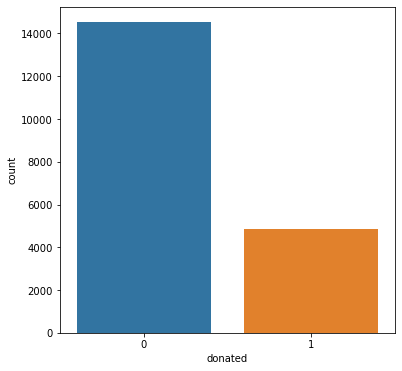

In [81]:
plt.figure(figsize=(6,6))
sns.countplot(x='donated', data=train_data)

train_data['donated'].value_counts()
# From the data, we can see that non-donors outnumber actual donors at almost 3 to 1
# From here we can see the amount of non-donors to donors in our dataset

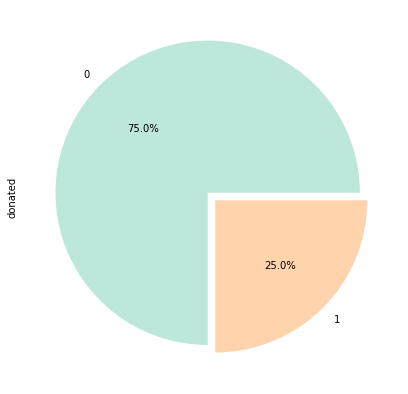

In [82]:
fig = plt.figure(figsize=(7,7))
ax = fig.subplots()
pie_chart = train_data.donated.value_counts().plot(kind = 'pie',explode = [0.035]*2, cmap = 'icefire',autopct =  '%0.1f%%')

### How does gender affect Donations?

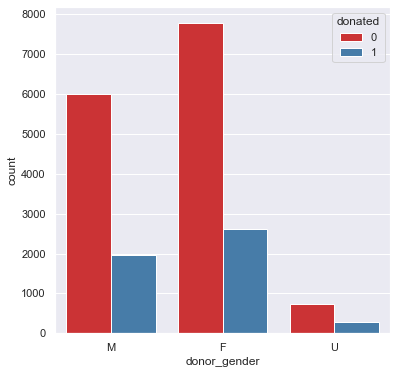

F    10401
M     7953
U     1018
Name: donor_gender, dtype: int64

In [83]:
sns.set(style="darkgrid")
plt.figure(figsize=(6,6))
sns.countplot(x='donor_gender',
              hue='donated',
              data=train_data,
             palette='Set1')
plt.show()

train_data['donor_gender'].value_counts()
# This graph shows us that a significant portion of the male and females fall as non-donors

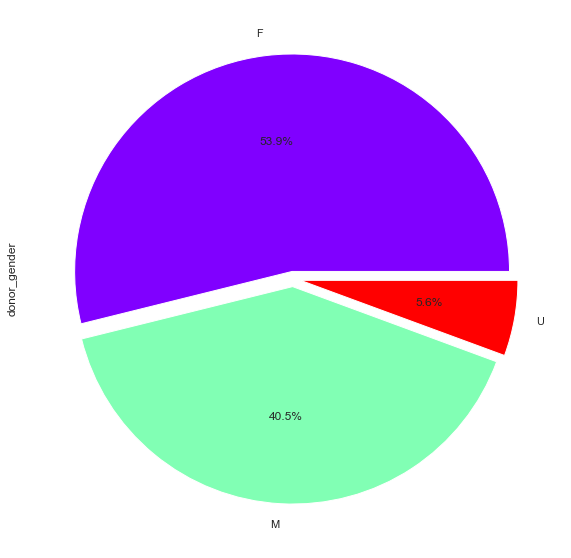

In [84]:
fig = plt.figure(figsize=(20,10))
ax = fig.subplots()
pie_chart = train_data[train_data.donated == 1].donor_gender.value_counts().plot(kind = 'pie',explode = [0.035]*3,ax = ax,cmap = 'rainbow',autopct =  '%0.1f%%')


### It is observed that females donate more than other gender classes

## How does having a home affect donations?

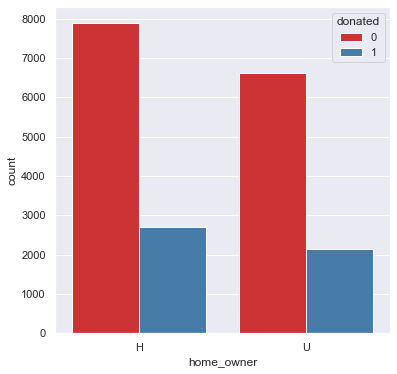

H    10606
U     8766
Name: home_owner, dtype: int64

In [85]:
sns.set(style="darkgrid")
plt.figure(figsize=(6,6))
sns.countplot(x='home_owner',
              hue='donated',
              data=train_data,
             palette='Set1')
plt.show()

train_data['home_owner'].value_counts()
# This graph shows us that home ownership is a strong indicator tthat someone will donate

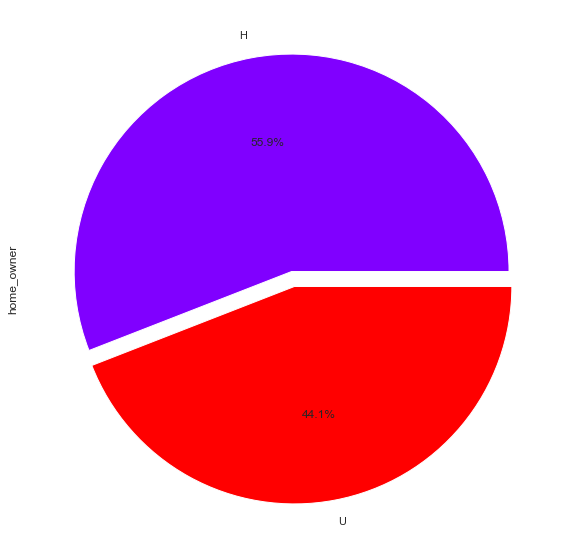

In [86]:
fig = plt.figure(figsize=(20,10))
ax = fig.subplots()
pie_chart = train_data[train_data.donated == 1].home_owner.value_counts().plot(kind = 'pie',explode = [0.035]*2,ax = ax,cmap = 'rainbow',autopct =  '%0.1f%%')


### It is observed that home owners donate more than non home owners

### How does the in-house program affect people who donate?

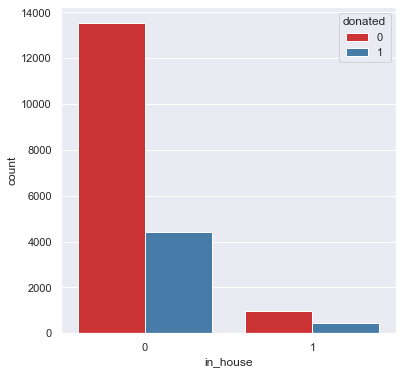

0    17954
1     1418
Name: in_house, dtype: int64

In [87]:
sns.set(style="darkgrid")
plt.figure(figsize=(6,6))
sns.countplot(x='in_house',
              hue='donated',
              data=train_data,
             palette='Set1')
plt.show()

train_data['in_house'].value_counts()
# This graph shows us that home ownership is a strong indicator tthat someone will donate

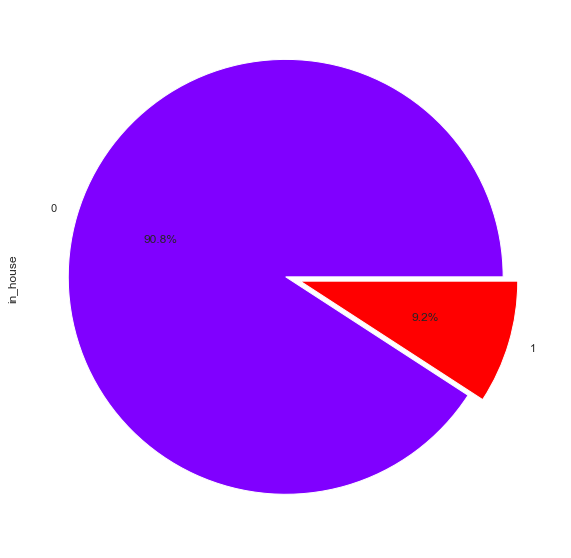

In [88]:
fig = plt.figure(figsize=(20,10))
ax = fig.subplots()
pie_chart = train_data[train_data.donated == 1].in_house.value_counts().plot(kind = 'pie',explode = [0.035]*2,ax = ax,cmap = 'rainbow',autopct =  '%0.1f%%')


### Users who did not participate in the in-house program donated more

## How does Urbanicity affect donations?

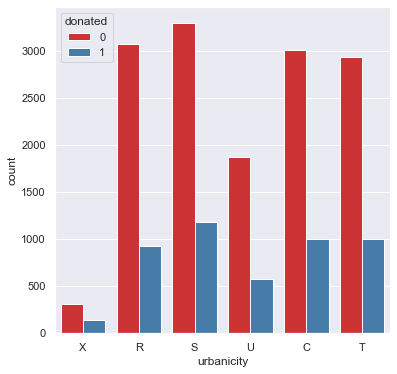

S    4491
C    4022
R    4005
T    3944
U    2456
X     454
Name: urbanicity, dtype: int64

In [89]:
sns.set(style="darkgrid")
plt.figure(figsize=(6,6))
sns.countplot(x='urbanicity',
              hue='donated',
              data=train_data,
             palette='Set1')
plt.show()

train_data['urbanicity'].value_counts()
# This graph shows us that home ownership is a strong indicator tthat someone will donate

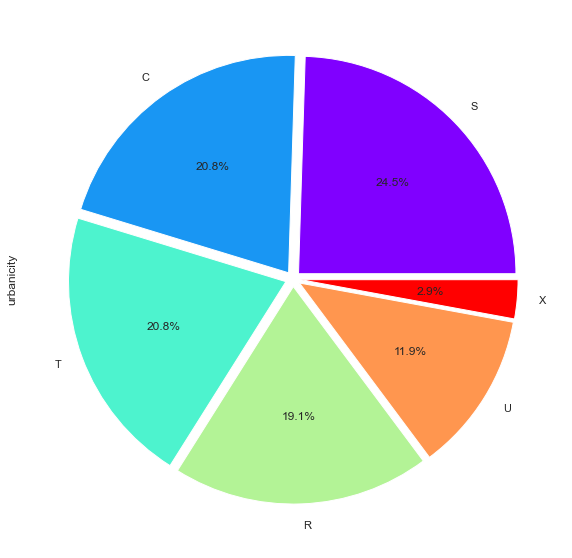

In [90]:
fig = plt.figure(figsize=(20,10))
ax = fig.subplots()
pie_chart = train_data[train_data.donated == 1].urbanicity.value_counts().plot(kind = 'pie',explode = [0.035]*6,ax = ax,cmap = 'rainbow',autopct =  '%0.1f%%')


### Users in surburban areas donate more than users in other classes

## How does Social Economic Status affect donations?

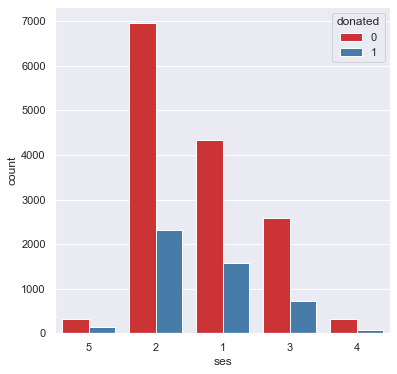

2    9284
1    5924
3    3323
5     454
4     387
Name: ses, dtype: int64

In [91]:
sns.set(style="darkgrid")
plt.figure(figsize=(6,6))
sns.countplot(x='ses',
              hue='donated',
              data=train_data,
             palette='Set1')
plt.show()

train_data['ses'].value_counts()
# This graph shows us that home ownership is a strong indicator tthat someone will donate

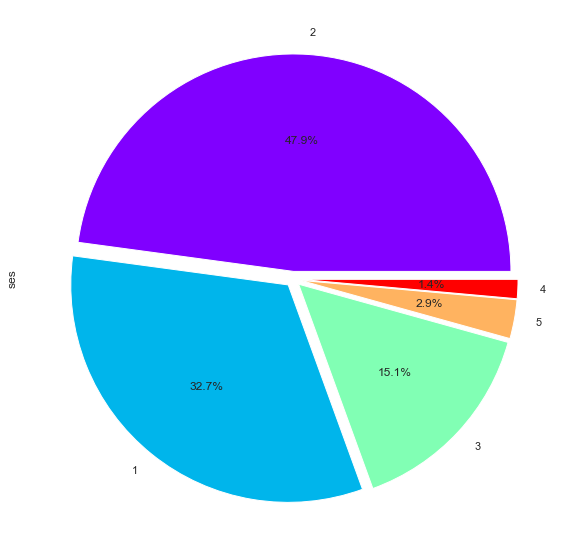

In [92]:
fig = plt.figure(figsize=(20,10))
ax = fig.subplots()
pie_chart = train_data[train_data.donated == 1].ses.value_counts().plot(kind = 'pie',explode = [0.035]*5,ax = ax,cmap = 'rainbow',autopct =  '%0.1f%%')


### Users in the 2nd SES class donate more than other SES classes

## Does income group affect donations?

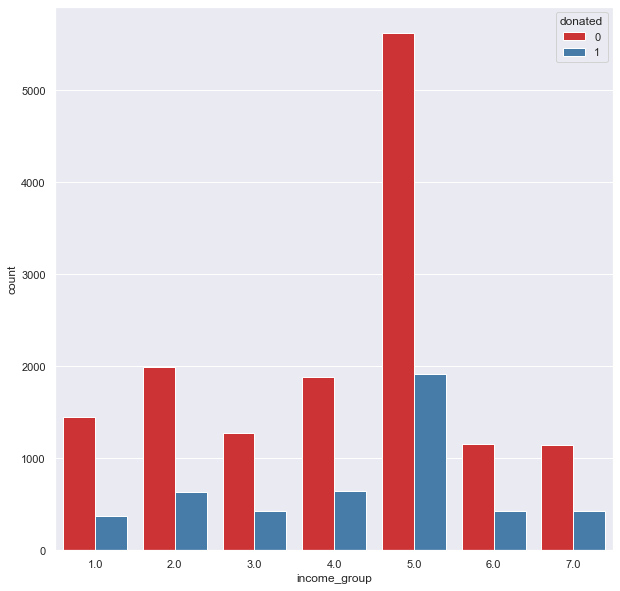

5.0    7541
2.0    2626
4.0    2526
1.0    1822
3.0    1699
6.0    1591
7.0    1567
Name: income_group, dtype: int64

In [93]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))
sns.countplot(x='income_group',
              hue='donated',
              data=train_data,
             palette='Set1')
plt.show()

train_data['income_group'].value_counts()
# This graph shows us that home ownership is a strong indicator tthat someone will donate

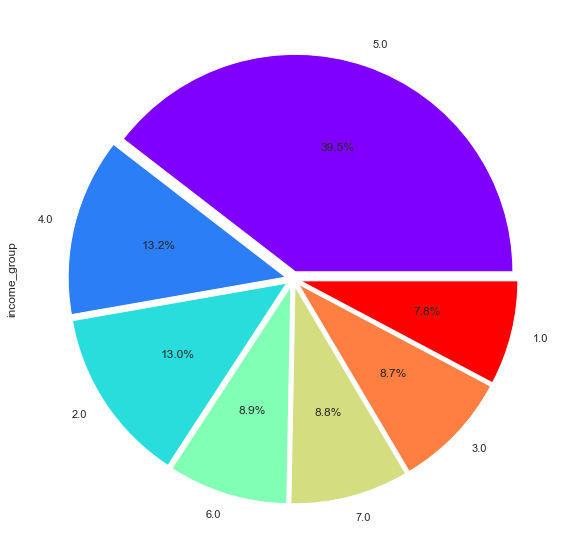

In [94]:
fig = plt.figure(figsize=(20,10))
ax = fig.subplots()
pie_chart = train_data[train_data.donated == 1].income_group.value_counts().plot(kind = 'pie',explode = [0.035]*7,ax = ax,cmap = 'rainbow',autopct =  '%0.1f%%')


### Users who belong to the 5th income group donate more than users in other income groups

## Does publishing number affect donations?

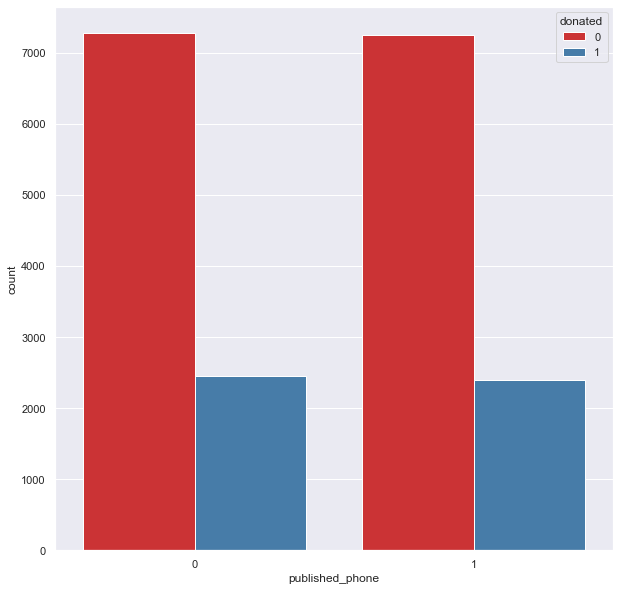

0    9730
1    9642
Name: published_phone, dtype: int64

In [95]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))
sns.countplot(x='published_phone',
              hue='donated',
              data=train_data,
             palette='Set1')
plt.show()

train_data['published_phone'].value_counts()
# This graph shows us that home ownership is a strong indicator tthat someone will donate

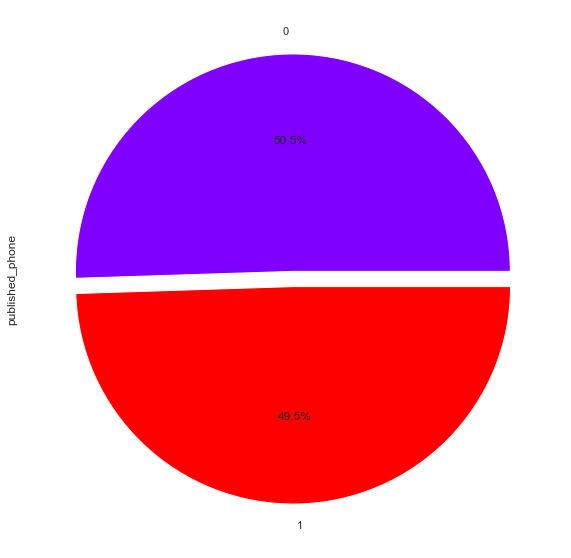

In [96]:
fig = plt.figure(figsize=(20,10))
ax = fig.subplots()
pie_chart = train_data[train_data.donated == 1].published_phone.value_counts().plot(kind = 'pie',explode = [0.035]*2,ax = ax,cmap = 'rainbow',autopct =  '%0.1f%%')


### There is litle difference on how publishing number affects donations

### Does Overlay source affect donations?

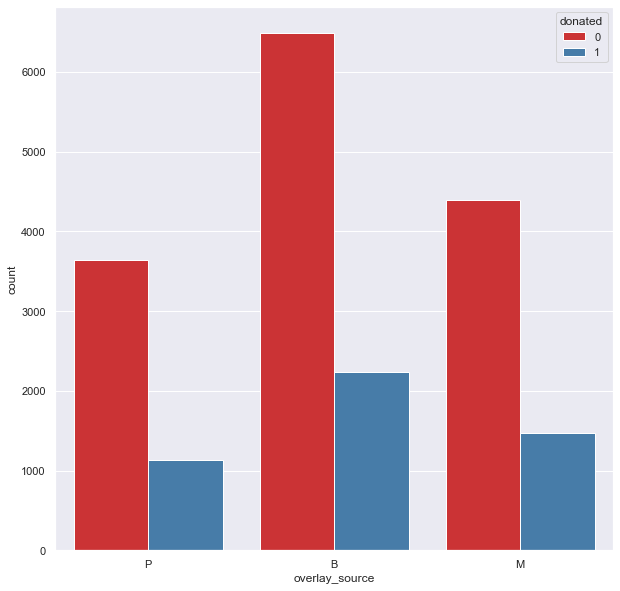

B    8732
M    5872
P    4768
Name: overlay_source, dtype: int64

In [97]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))
sns.countplot(x='overlay_source',
              hue='donated',
              data=train_data,
             palette='Set1')
plt.show()

train_data['overlay_source'].value_counts()
# This graph shows us that home ownership is a strong indicator tthat someone will donate

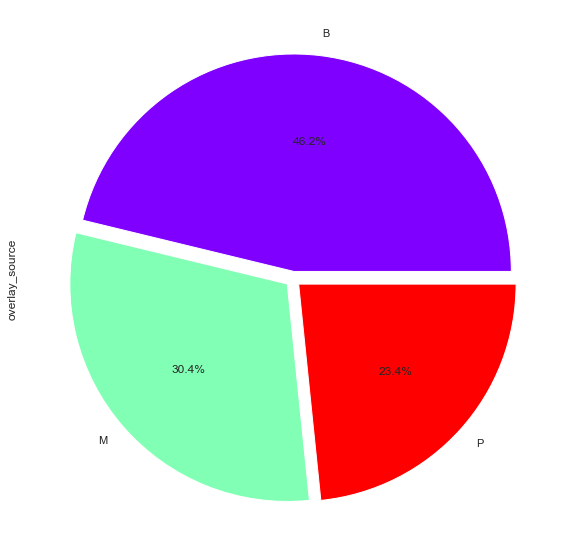

In [98]:
fig = plt.figure(figsize=(20,10))
ax = fig.subplots()
pie_chart = train_data[train_data.donated == 1].overlay_source.value_counts().plot(kind = 'pie',explode = [0.035]*3,ax = ax,cmap = 'rainbow',autopct =  '%0.1f%%')


### Users who use both Metromail and Polk donate more than other users

## How does wealth rating affect donations?

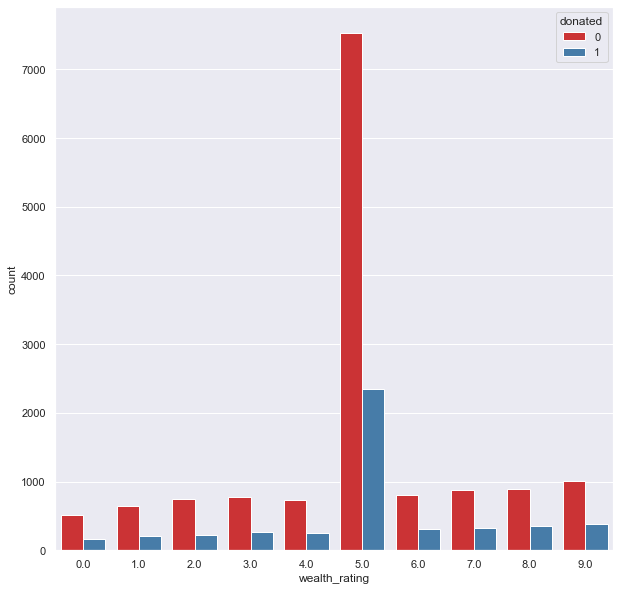

5.0    9888
9.0    1390
8.0    1248
7.0    1199
6.0    1117
3.0    1046
4.0     987
2.0     974
1.0     854
0.0     669
Name: wealth_rating, dtype: int64

In [99]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))
sns.countplot(x='wealth_rating',
              hue='donated',
              data=train_data,
             palette='Set1')
plt.show()

train_data['wealth_rating'].value_counts()
# This graph shows us that home ownership is a strong indicator tthat someone will donate

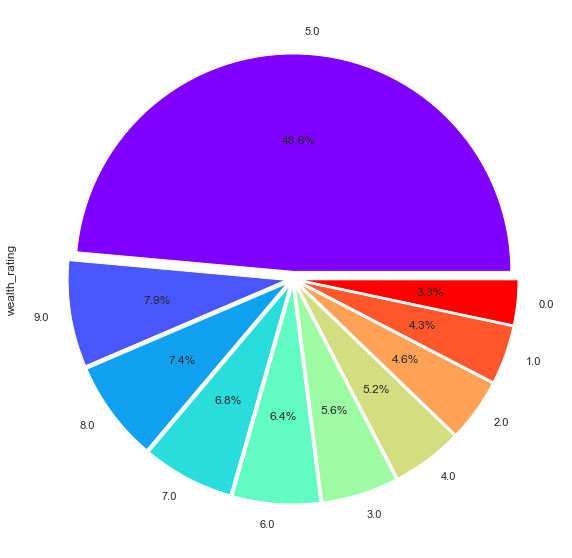

In [100]:
fig = plt.figure(figsize=(20,10))
ax = fig.subplots()
pie_chart = train_data[train_data.donated == 1].wealth_rating.value_counts().plot(kind = 'pie',explode = [0.035]*10,ax = ax,cmap = 'rainbow',autopct =  '%0.1f%%')


###

### Users who belong to the 5th Wealth rating class donate more than other wealth rating class

## How does Pep start affect donations?

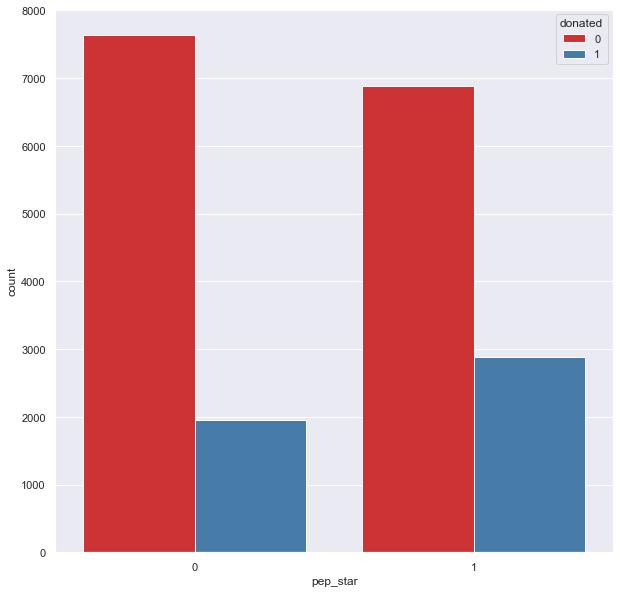

1    9772
0    9600
Name: pep_star, dtype: int64

In [101]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))
sns.countplot(x='pep_star',
              hue='donated',
              data=train_data,
             palette='Set1')
plt.show()

train_data['pep_star'].value_counts()
# This graph shows us that home ownership is a strong indicator tthat someone will donate

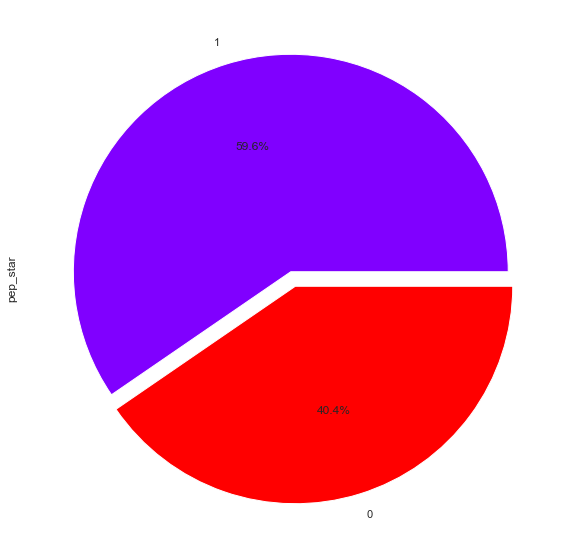

In [102]:
fig = plt.figure(figsize=(20,10))
ax = fig.subplots()
pie_chart = train_data[train_data.donated == 1].pep_star.value_counts().plot(kind = 'pie',explode = [0.035]*2,ax = ax,cmap = 'rainbow',autopct =  '%0.1f%%')


### Users who are part of the pep star class 1 donate more than the other pep star class

## How does the recency status 96k affect donations?

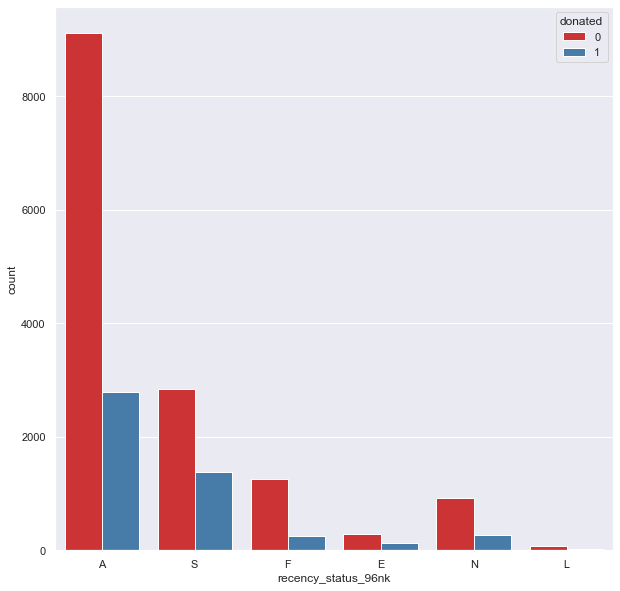

A    11918
S     4221
F     1521
N     1192
E      427
L       93
Name: recency_status_96nk, dtype: int64

In [103]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))
sns.countplot(x='recency_status_96nk',
              hue='donated',
              data=train_data,
             palette='Set1')
plt.show()

train_data['recency_status_96nk'].value_counts()
# This graph shows us that home ownership is a strong indicator tthat someone will donate

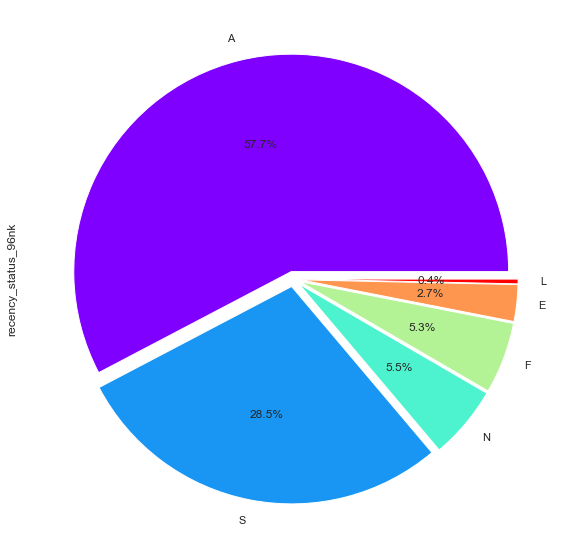

In [104]:
fig = plt.figure(figsize=(20,10))
ax = fig.subplots()
pie_chart = train_data[train_data.donated == 1].recency_status_96nk.value_counts().plot(kind = 'pie',explode = [0.035]*6,ax = ax,cmap = 'rainbow',autopct =  '%0.1f%%')


### Users who belong to the Class A of Recency Status 96k donate more than other users

## How does Frequency status 97nk affect donations?

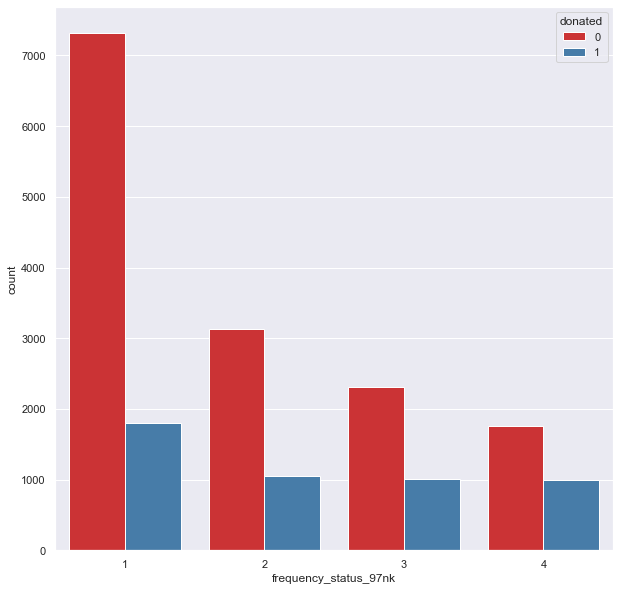

1    9118
2    4191
3    3318
4    2745
Name: frequency_status_97nk, dtype: int64

In [105]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))
sns.countplot(x='frequency_status_97nk',
              hue='donated',
              data=train_data,
             palette='Set1')
plt.show()

train_data['frequency_status_97nk'].value_counts()
# This graph shows us that home ownership is a strong indicator tthat someone will donate

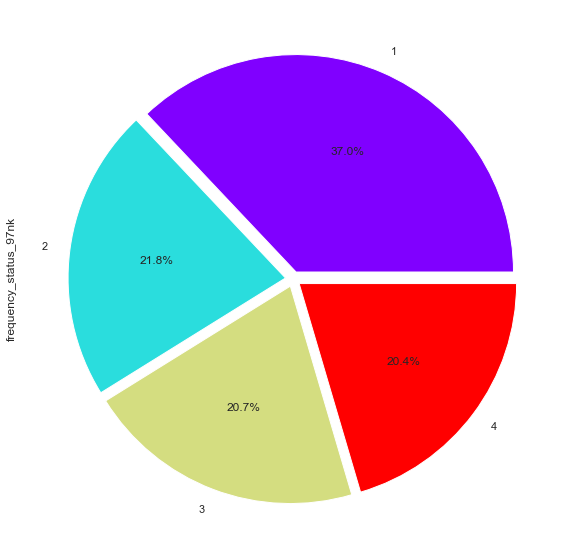

In [106]:
fig = plt.figure(figsize=(20,10))
ax = fig.subplots()
pie_chart = train_data[train_data.donated == 1].frequency_status_97nk.value_counts().plot(kind = 'pie',explode = [0.035]*4,ax = ax,cmap = 'rainbow',autopct =  '%0.1f%%')


### Users who belong to class 1 of frequency_status_97nk donate more than other classes 

## How does Recent card response count affect donations?

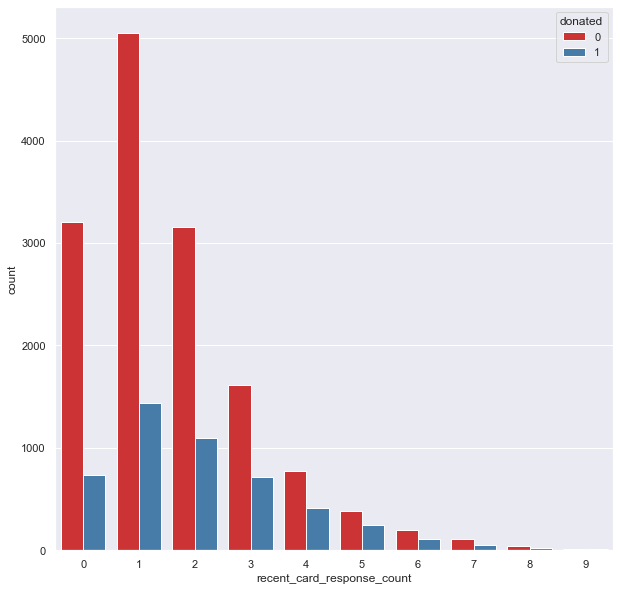

1    6487
2    4250
0    3936
3    2331
4    1185
5     631
6     313
7     160
8      60
9      19
Name: recent_card_response_count, dtype: int64

In [107]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))
sns.countplot(x='recent_card_response_count',
              hue='donated',
              data=train_data,
             palette='Set1')
plt.show()

train_data['recent_card_response_count'].value_counts()
# This graph shows us that home ownership is a strong indicator tthat someone will donate

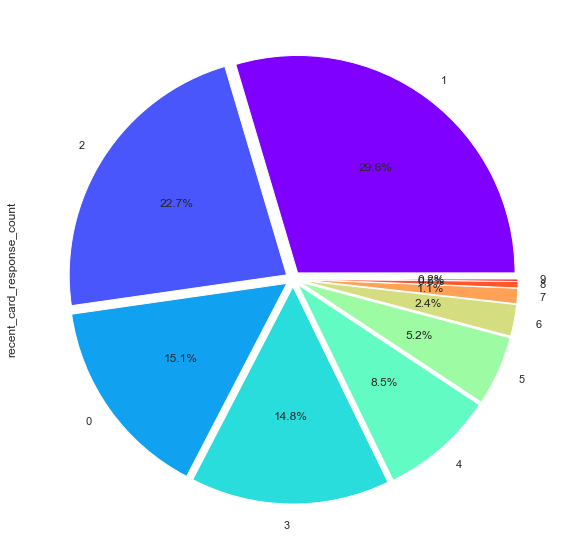

In [108]:
fig = plt.figure(figsize=(20,10))
ax = fig.subplots()
pie_chart = train_data[train_data.donated == 1].recent_card_response_count.value_counts().plot(kind = 'pie',explode = [0.035]*10,ax = ax,cmap = 'rainbow',autopct =  '%0.1f%%')


### Users who belong to class 1 of recent card response count donate more than other classes

## How does Months since origin affect donations?

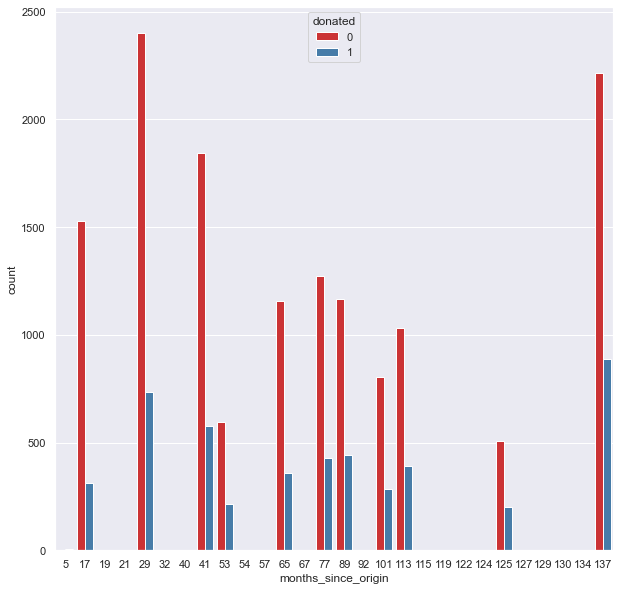

29     3136
137    3100
41     2422
17     1838
77     1698
89     1611
65     1518
113    1423
101    1087
53      811
125     705
5         7
127       1
129       1
67        1
19        1
130       1
115       1
54        1
21        1
134       1
119       1
40        1
57        1
122       1
92        1
124       1
32        1
Name: months_since_origin, dtype: int64

In [109]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))
sns.countplot(x='months_since_origin',
              hue='donated',
              data=train_data,
             palette='Set1')
plt.show()

train_data['months_since_origin'].value_counts()
# This graph shows us that home ownership is a strong indicator tthat someone will donate

## How does Cluster code affect donations?

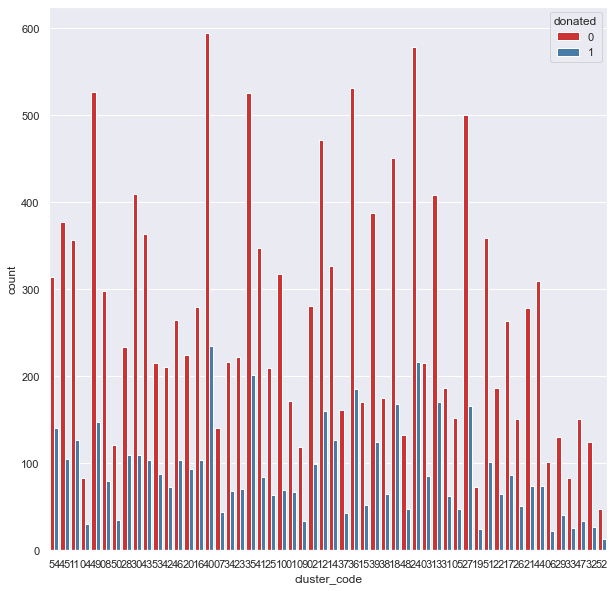

40    830
24    795
35    727
36    716
49    675
27    666
12    631
18    619
13    579
30    519
39    512
11    484
45    482
43    468
51    460
14    454
54    454
41    431
10    387
16    384
44    383
02    380
08    378
46    369
21    353
17    349
28    343
20    317
53    303
03    300
23    293
42    284
34    284
25    273
22    251
31    249
38    240
01    239
15    223
37    204
26    202
05    199
47    185
07    184
48    180
29    170
50    156
09    153
32    152
06    123
04    113
33    109
19     98
52     60
Name: cluster_code, dtype: int64

In [110]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))
sns.countplot(x='cluster_code',
              hue='donated',
              data=train_data,
             palette='Set1')
plt.show()

train_data['cluster_code'].value_counts()
# This graph shows us that home ownership is a strong indicator tthat someone will donate

<AxesSubplot:xlabel='cluster_code', ylabel='Count'>

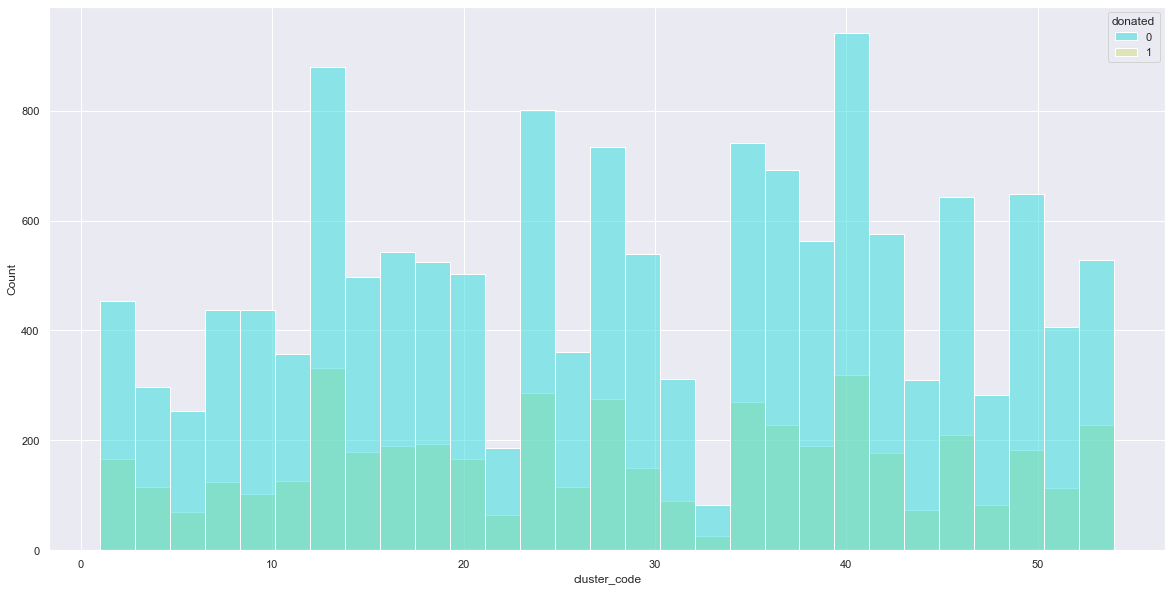

In [111]:
fig = plt.figure(figsize=(20,10))
sns.histplot(x = train_data.cluster_code.astype(int), hue = train_data.donated, palette='rainbow')

## How does Recent star status affect donations?

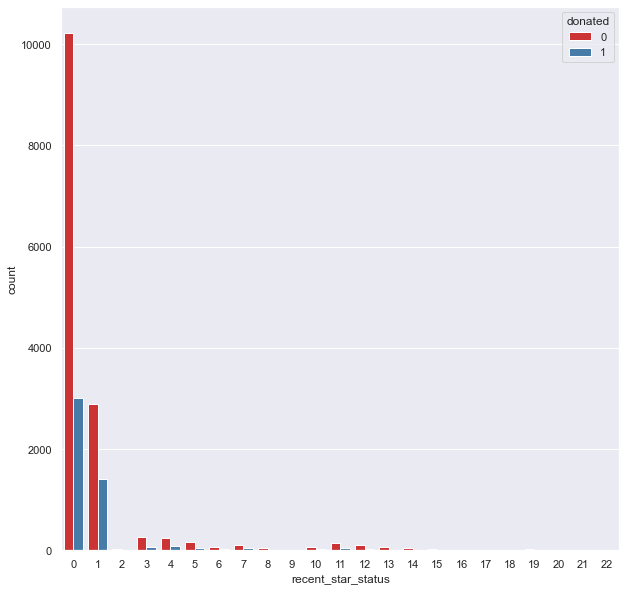

0     13239
1      4289
3       346
4       320
5       205
11      183
7       140
12      122
6        88
10       86
13       84
14       61
8        54
19       27
2        26
15       26
16       18
17       15
9        15
18       12
21       10
20        4
22        2
Name: recent_star_status, dtype: int64

In [112]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 10))
sns.countplot(x='recent_star_status',
              hue='donated',
              data=train_data,
             palette='Set1')
plt.show()

train_data['recent_star_status'].value_counts()
# This graph shows us that home ownership is a strong indicator tthat someone will donate

# Exploring Numerical variables

<AxesSubplot:ylabel='Frequency'>

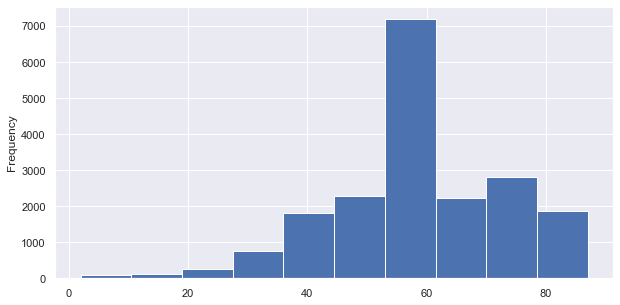

In [113]:
train_data['donor_age'].plot.hist(figsize=(10,5))
# This shows us that most of the donors fall betweeen the ages of 30 - 80 
# This gives us valuable information o who to target based on age

<AxesSubplot:ylabel='Frequency'>

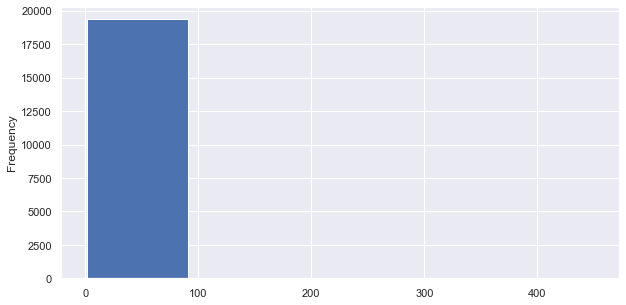

In [114]:
train_data['lifetime_avg_gift_amt'].plot.hist(bins=5, figsize=(10,5))
# This metric is to show us the average gift amount from donors. From the graph we can see the that this amount is close to a 100

<AxesSubplot:ylabel='Frequency'>

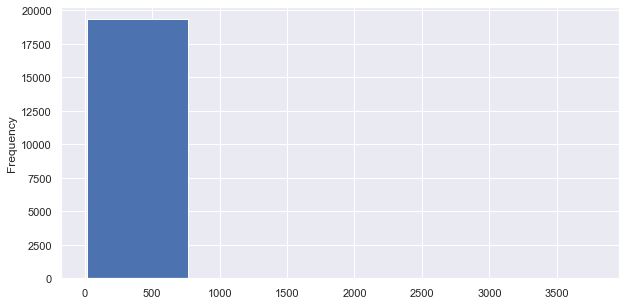

In [115]:
train_data['lifetime_gift_amount'].plot.hist(bins=5, figsize=(10,5))
# This metric is to show us the overall gift amount from donors. From the graph we can see the that this amount is close to a 100

## Violin plots

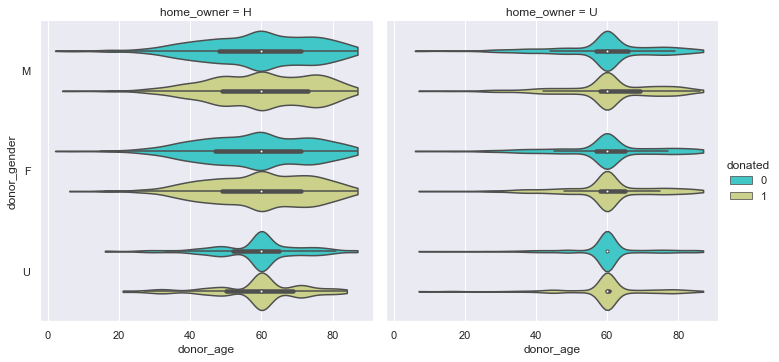

In [116]:
# Plotting violin plots
  #
sns.catplot(x="donor_age", y="donor_gender",hue="donated",col = 'home_owner', data=train_data,orient="h", height=5, aspect=1, palette="rainbow", kind="violin", dodge=True, cut=0, bw=.2)
plt.show()

## Bar charts

*From the above chart we can make these observations;*


*   The dataset is imbalanced, it has more users who didnt donate cases than users who donated
*   More females donated than any other gender

## Distribution of age per gender - Histograms

C:\Users\kwentua\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kwentua\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kwentua\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

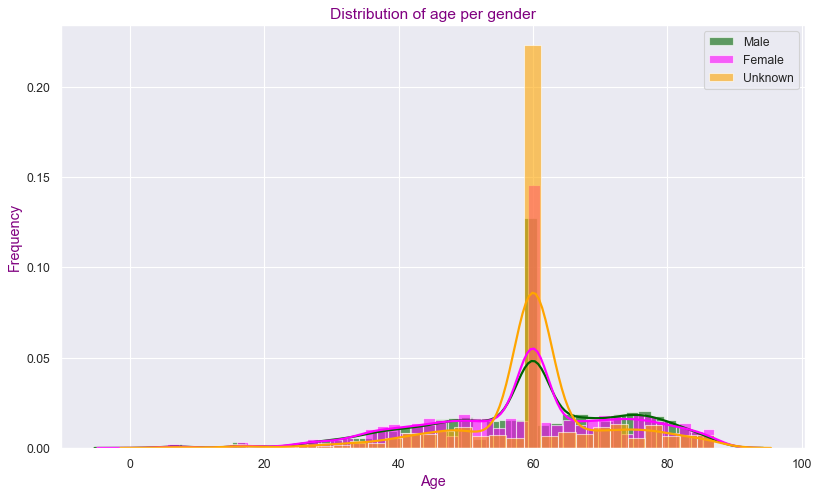

In [117]:
# Plotting histogram to show distribution of age per gender
# 
male = train_data.loc[train_data.donor_gender=='M', 'donor_age']    # Selecting only male datapoints in the donor age column
female = train_data.loc[train_data.donor_gender=='F', 'donor_age']  # Selecting only female datapoints in the donor age column
unknown = train_data.loc[train_data.donor_gender=='U', 'donor_age']  # Selecting only unknown datapoints in the donor age column

# Creating a dictionary containing opacaticy and line width in a dictionary for efficiency
#
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

# Plotting the histograms
#
plt.figure(figsize=(12,7), dpi= 80)
sns.distplot(male, color="darkgreen", label="Male", **kwargs)
sns.distplot(female, color="fuchsia", label="Female", **kwargs)
sns.distplot(unknown, color="orange", label="Unknown", **kwargs)
plt.title('Distribution of age per gender', fontsize = 14, color = 'purple')
plt.xlabel('Age', fontsize = 13, color = 'purple')
plt.ylabel('Frequency', fontsize = 13, color = 'purple')
plt.legend()
plt.show()

*From the above histogram, it can be deduced that both the ages of male, female and unknown are skewed to the left. This means that the median and mode are greater than the mean*

## Distribution of amount donated per gender - Histograms

C:\Users\kwentua\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kwentua\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kwentua\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

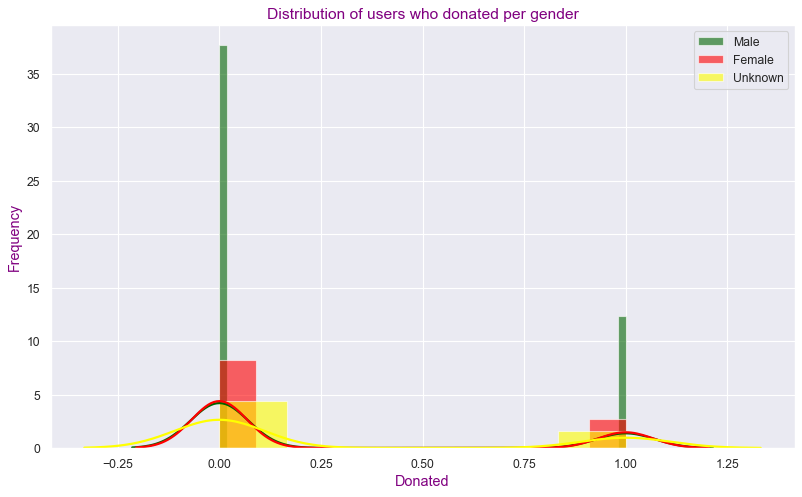

In [118]:
# Plotting histogram to show distribution of age per gender
# 
male = train_data.loc[train_data.donor_gender=='M', 'donated']    # Selecting only male datapoints in the amount donated column
female = train_data.loc[train_data.donor_gender=='F', 'donated']  # Selecting only female datapoints in the amount donated column
unknown = train_data.loc[train_data.donor_gender=='U', 'donated']  # Selecting only unknown datapoints in the amount donated column

# Creating a dictionary containing opacaticy and line width in a dictionary for efficiency
#
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

# Plotting the histograms
#
plt.figure(figsize=(12,7), dpi= 80)
sns.distplot(male, color="darkgreen", label="Male", **kwargs)
sns.distplot(female, color="red", label="Female", **kwargs)
sns.distplot(unknown, color="yellow", label="Unknown", **kwargs)
plt.title('Distribution of users who donated per gender', fontsize = 14, color = 'purple')
plt.xlabel('Donated', fontsize = 13, color = 'purple')
plt.ylabel('Frequency', fontsize = 13, color = 'purple')
plt.legend()
plt.show()

*From the above histogram, it can be deduced that the amount donated by male, female and unknown are skewed to the right. This means that the median and mode are less than the mean*

## Distribution of the months since origin per gender - Histograms

C:\Users\kwentua\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kwentua\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kwentua\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

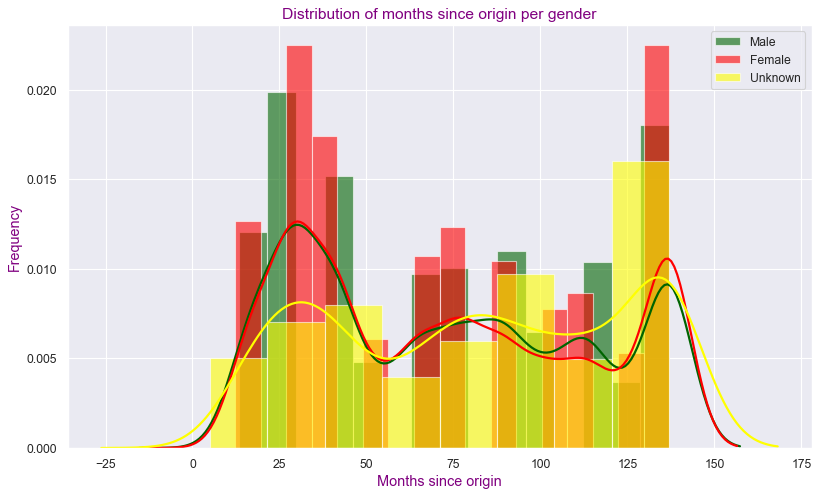

In [119]:
# Plotting histogram to show distribution of age per gender
# 
male = train_data.loc[train_data.donor_gender=='M', 'months_since_origin']    # Selecting only male datapoints in the months since origin column
female = train_data.loc[train_data.donor_gender=='F', 'months_since_origin']  # Selecting only female datapoints in the months since origin column
unknown = train_data.loc[train_data.donor_gender=='U', 'months_since_origin']  # Selecting only unknown datapoints in the months since origin column

# Creating a dictionary containing opacaticy and line width in a dictionary for efficiency
#
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

# Plotting the histograms
#
plt.figure(figsize=(12,7), dpi= 80)
sns.distplot(male, color="darkgreen", label="Male", **kwargs)
sns.distplot(female, color="red", label="Female", **kwargs)
sns.distplot(unknown, color="yellow", label="Unknown", **kwargs)
plt.title('Distribution of months since origin per gender', fontsize = 14, color = 'purple')
plt.xlabel('Months since origin', fontsize = 13, color = 'purple')
plt.ylabel('Frequency', fontsize = 13, color = 'purple')
plt.legend()
plt.show()

## Distribution of the median home value per gender - Histograms

C:\Users\kwentua\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kwentua\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kwentua\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

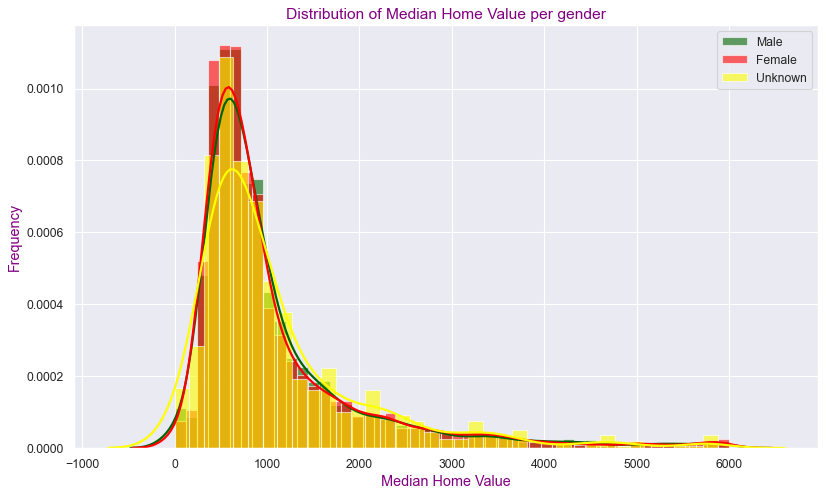

In [120]:
# Plotting histogram to show distribution of age per gender
# 
male = train_data.loc[train_data.donor_gender=='M', 'median_home_value']    # Selecting only male datapoints in the Median Home Value column
female = train_data.loc[train_data.donor_gender=='F', 'median_home_value']  # Selecting only female datapoints in the Median Home Value column
unknown = train_data.loc[train_data.donor_gender=='U', 'median_home_value']  # Selecting only unknown datapoints in the Median Home Value column

# Creating a dictionary containing opacaticy and line width in a dictionary for efficiency
#
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

# Plotting the histograms
#
plt.figure(figsize=(12,7), dpi= 80)
sns.distplot(male, color="darkgreen", label="Male", **kwargs)
sns.distplot(female, color="red", label="Female", **kwargs)
sns.distplot(unknown, color="yellow", label="Unknown", **kwargs)
plt.title('Distribution of Median Home Value per gender', fontsize = 14, color = 'purple')
plt.xlabel('Median Home Value', fontsize = 13, color = 'purple')
plt.ylabel('Frequency', fontsize = 13, color = 'purple')
plt.legend()
plt.show()

*From the above histogram, it can be deduced that the median home value by male, female and unknown are skewed to the right. This means that the median and mode are less than the mean*

## Distribution of the lifetime gift amount per gender - Histograms

C:\Users\kwentua\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kwentua\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kwentua\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

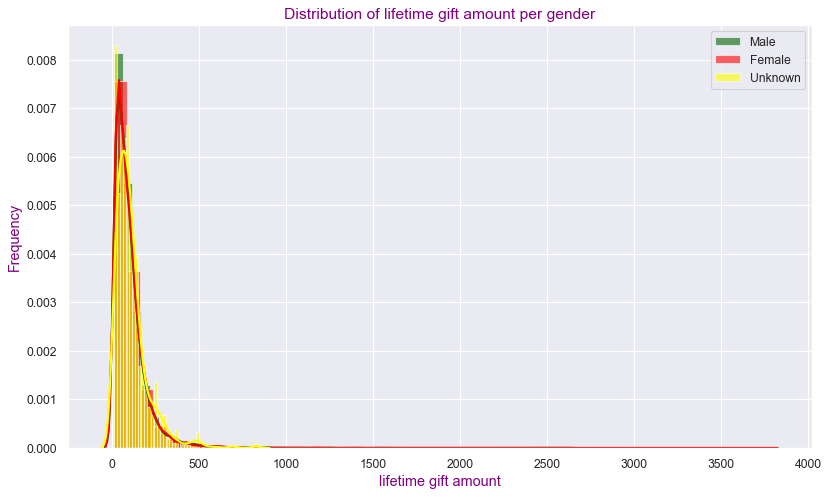

In [121]:
# Plotting histogram to show distribution of lifetime gift amount per gender
# 
male = train_data.loc[train_data.donor_gender=='M', 'lifetime_gift_amount']    # Selecting only male datapoints in the lifetime gift amount column
female = train_data.loc[train_data.donor_gender=='F', 'lifetime_gift_amount']  # Selecting only female datapoints in the lifetime gift amount column
unknown = train_data.loc[train_data.donor_gender=='U', 'lifetime_gift_amount']  # Selecting only unknown datapoints in the lifetime gift amount column

# Creating a dictionary containing opacaticy and line width in a dictionary for efficiency
#
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

# Plotting the histograms
#
plt.figure(figsize=(12,7), dpi= 80)
sns.distplot(male, color="darkgreen", label="Male", **kwargs)
sns.distplot(female, color="red", label="Female", **kwargs)
sns.distplot(unknown, color="yellow", label="Unknown", **kwargs)
plt.title('Distribution of lifetime gift amount per gender', fontsize = 14, color = 'purple')
plt.xlabel('lifetime gift amount', fontsize = 13, color = 'purple')
plt.ylabel('Frequency', fontsize = 13, color = 'purple')
plt.legend()
plt.show()

*From the above histogram, it can be deduced that the lifetime gift amount by male, female and unknown are skewed to the right. This means that the median and mode are less than the mean*

## Distribution of the last gift amount per gender - Histograms

C:\Users\kwentua\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kwentua\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kwentua\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

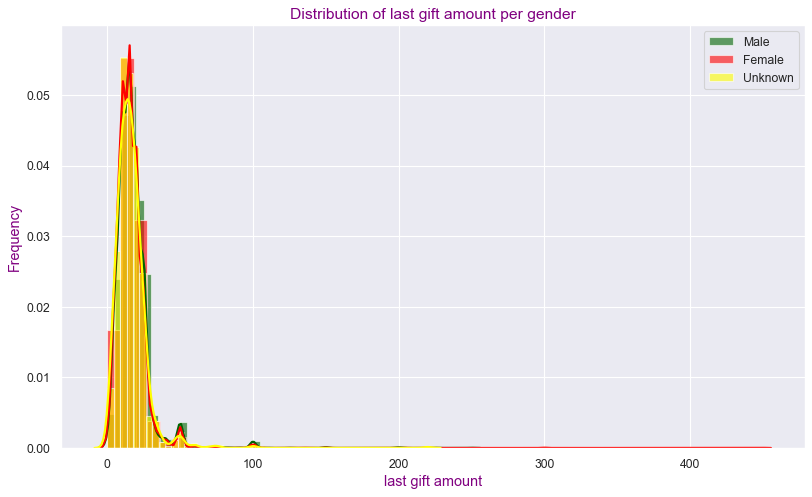

In [122]:
# Plotting histogram to show distribution of lifetime gift amount per gender
# 
male = train_data.loc[train_data.donor_gender=='M', 'last_gift_amt']    # Selecting only male datapoints in the last gift amount column
female = train_data.loc[train_data.donor_gender=='F', 'last_gift_amt']  # Selecting only female datapoints in the last gift amount column
unknown = train_data.loc[train_data.donor_gender=='U', 'last_gift_amt']  # Selecting only unknown datapoints in the last gift amount column

# Creating a dictionary containing opacaticy and line width in a dictionary for efficiency
#
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

# Plotting the histograms
#
plt.figure(figsize=(12,7), dpi= 80)
sns.distplot(male, color="darkgreen", label="Male", **kwargs)
sns.distplot(female, color="red", label="Female", **kwargs)
sns.distplot(unknown, color="yellow", label="Unknown", **kwargs)
plt.title('Distribution of last gift amount per gender', fontsize = 14, color = 'purple')
plt.xlabel('last gift amount', fontsize = 13, color = 'purple')
plt.ylabel('Frequency', fontsize = 13, color = 'purple')
plt.legend()
plt.show()

*From the above histogram, it can be deduced that the median household income by male, female and unknown are skewed to the right. This means that the median and mode are less than the mean*

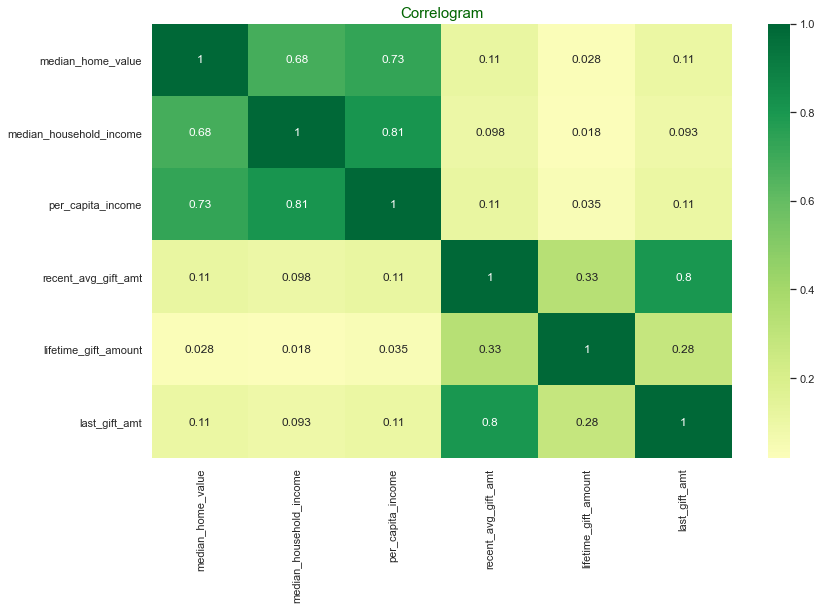

In [123]:
# Plotting a heatmap to show correlations between variables
#
corr = train_data[['median_home_value', 'median_household_income', 'per_capita_income', 'recent_avg_gift_amt', 'lifetime_gift_amount', 'last_gift_amt']].corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

In [124]:
train_data.head()

,donated,control_number,months_since_origin,donor_age,in_house,urbanicity,ses,cluster_code,home_owner,donor_gender,...,lifetime_gift_range,lifetime_max_gift_amt,lifetime_min_gift_amt,last_gift_amt,card_prom_12,number_prom_12,months_since_last_gift,months_since_first_gift,file_avg_gift,file_card_gift
0,0,5,101,87.0,0,X,5,54,H,M,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,12,137,79.0,0,R,2,45,H,M,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,37,113,75.0,0,S,1,11,H,F,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,38,92,60.0,0,U,2,04,H,F,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,41,101,74.0,0,R,2,49,U,F,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3


In [125]:
test_data.head(10)

,control_number,months_since_origin,donor_age,in_house,urbanicity,ses,cluster_code,home_owner,donor_gender,income_group,...,lifetime_gift_range,lifetime_max_gift_amt,lifetime_min_gift_amt,last_gift_amt,card_prom_12,number_prom_12,months_since_last_gift,months_since_first_gift,file_avg_gift,file_card_gift
0,139,101,59.0,0,R,2,46,U,F,5.0,...,16.0,21.0,5.0,21.0,4,10,26,90,14.71,2
1,142,137,59.0,0,R,2,43,U,F,5.0,...,9.0,11.0,2.0,10.0,9,22,22,129,6.00,14
2,282,17,30.0,0,T,1,35,H,M,6.0,...,15.0,20.0,5.0,20.0,5,14,20,87,8.44,1
3,368,137,75.0,0,U,1,02,H,M,6.0,...,5.0,10.0,5.0,10.0,10,24,19,129,6.50,22
4,387,5,59.0,0,T,2,40,U,F,2.0,...,7.0,10.0,3.0,5.0,5,12,18,85,5.83,2
5,458,125,80.0,0,T,2,37,U,F,5.0,...,10.0,15.0,5.0,15.0,7,14,25,124,9.67,8
6,564,89,59.0,0,C,1,24,H,F,7.0,...,45.0,50.0,5.0,18.0,11,24,16,79,21.00,7
7,665,41,53.0,0,T,2,40,H,F,3.0,...,10.0,20.0,10.0,15.0,11,27,16,73,13.67,1
8,702,101,75.0,0,T,1,35,H,F,7.0,...,7.0,11.0,4.0,10.0,10,26,13,92,7.95,7
9,743,113,60.0,0,R,2,46,H,M,5.0,...,10.0,15.0,5.0,10.0,11,27,11,113,9.73,10


In [126]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
donated,19372.0,0.250000,0.433024,0.00,0.000,0.000,0.250,1.0
control_number,19372.0,96546.225377,55830.643871,5.00,48289.000,96937.000,145429.500,191779.0
months_since_origin,19372.0,73.409973,41.255574,5.00,29.000,65.000,113.000,137.0
donor_age,19372.0,59.192804,14.454832,2.00,51.000,60.000,69.000,87.0
in_house,19372.0,0.073198,0.260469,0.00,0.000,0.000,0.000,1.0
income_group,19372.0,4.155224,1.702428,1.00,3.000,5.000,5.000,7.0
published_phone,19372.0,0.497729,0.500008,0.00,0.000,0.000,1.000,1.0
mor_hit_rate,19372.0,3.361656,9.503481,0.00,0.000,0.000,3.000,241.0
wealth_rating,19372.0,5.002942,2.078810,0.00,5.000,5.000,6.000,9.0
median_home_value,19372.0,1079.871929,960.753448,0.00,518.000,747.000,1227.000,6000.0


In [127]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
control_number,2148.0,96146.865456,54518.044553,139.00,51402.000,96092.000,143196.000,191710.0
months_since_origin,2148.0,73.631285,41.969403,5.00,29.000,65.000,113.000,137.0
donor_age,2148.0,58.386406,14.558321,4.00,50.000,59.000,68.000,87.0
in_house,2148.0,0.067970,0.251753,0.00,0.000,0.000,0.000,1.0
income_group,2148.0,4.148510,1.684697,1.00,3.000,5.000,5.000,7.0
published_phone,2148.0,0.493017,0.500068,0.00,0.000,0.000,1.000,1.0
mor_hit_rate,2148.0,3.357076,8.585609,0.00,0.000,0.000,3.000,240.0
wealth_rating,2148.0,4.986499,2.048391,0.00,5.000,5.000,6.000,9.0
median_home_value,2148.0,1028.019088,895.363300,0.00,508.750,738.500,1159.500,5982.0
median_household_income,2148.0,339.798417,149.754159,0.00,239.000,314.000,415.000,1500.0


In [128]:
train_data.to_csv('cleaned_train_data.csv', encoding = 'utf-8', index = True)
test_data.to_csv('cleaned_test_data.csv', encoding = 'utf-8', index = True)
reg_train_data.to_csv('cleaned_data_for_regression.csv', encoding = 'utf-8', index = True)